Teniendo el Dataset preparado compenzamos a hacer las primeras pruebas con modlos de regresion y clasificacion 

Comenzaremos preparando los datos en Train y Test

In [7]:
#Cargamos librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_squared_error, r2_score

#para guardar el modelo
from pickle import dump 

#eliminamos mensajes de error
import warnings
warnings.filterwarnings('ignore')




In [25]:
#cargamos el dataset
metadata_processed = pd.read_csv ('/Users/luiseduardogarciablanco/Desktop/bootcamp/Proyecto_Final_Cancer/src/metadata_processed.csv', index_col=0)
metadata_processed

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,token_solar,token_special,token_spitz,token_spreading,token_squamous,token_sunexposed,token_superficial,token_trichilemmal,token_type,token_verruca
isic_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0015670,0,60.0,3.04,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,...,0,0,0,0,0,0,0,0,0,0
ISIC_0015845,0,60.0,1.10,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,...,0,0,0,0,0,0,0,0,0,0
ISIC_0015864,0,60.0,3.40,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,...,0,0,0,0,0,0,0,0,0,0
ISIC_0015902,0,65.0,3.22,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,...,0,0,0,0,0,0,0,0,0,0
ISIC_0024200,0,55.0,2.73,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_9999937,0,70.0,6.80,22.574335,14.944666,27.663259,26.767135,35.705132,30.656525,50.784168,...,0,0,0,0,0,0,0,0,0,0
ISIC_9999951,0,60.0,3.11,19.977640,16.026870,34.158840,31.011870,39.571870,34.908400,59.678970,...,0,0,0,0,0,0,0,0,0,0
ISIC_9999960,0,65.0,2.05,17.332567,12.364397,29.845326,26.500073,34.513206,29.242644,59.854275,...,0,0,0,0,0,0,0,0,0,0


para evitar problemas en la creacion y entrenamiento de los modelos, haremos una revision de caracteres especiales en el nombre de nuestras variables 

In [26]:
# Limpiar los nombres de las columnas eliminando o reemplazando caracteres especiales y espacios en blanco
metadata_processed.columns = metadata_processed.columns.str.replace('[\[\]\{\}\:\,\s]', '_', regex=True)

Tomando en cuenta que ya tenemos el dataset preparado para las primeras pruebas, separamos los conjuntos de train y test

In [27]:
# Separar características y variable objetivo
X = metadata_processed.drop('target', axis=1)
y = metadata_processed['target']

In [28]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape},{y_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape},{y_test.shape}')

Tamaño del conjunto de entrenamiento: (305531, 136),(305531,)
Tamaño del conjunto de prueba: (76383, 136),(76383,)


ya que tenemos menos de un 1% de valores positivos en el target, comprobaremos si en el conjunto de test hay algun valor para hacer la comprobacion, asi nos aseguramos que se pueda hacer las pruebas con valores nunca vistos para los modelo

In [30]:

# Comprobamos cuántos valores de 'y_test' son iguales a 1
target_1_count = np.sum(y_test == 1)

# Mostramos el resultado
print(f"El número de observaciones en el conjunto de test donde la variable objetivo es positiva (== 1) : {target_1_count}")


El número de observaciones en el conjunto de test donde la variable objetivo es positiva (== 1) : 77


Creamos los modelos y eliminamos mensajes de error

In [13]:
#eliminamos mensajes de error

# modelos
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
gb =GradientBoostingClassifier (n_estimators=100, learning_rate=0.01, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state = 42, use_label_encoder=False, eval_metric='mlogloss')
lgb = LGBMClassifier(n_estimators=100, learning_rate=0.01, random_state = 42, verbose=-1)

#modelos con valores por defecto
'''ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()'''

# entrenamiento
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)


LGBMClassifier(learning_rate=0.01, random_state=42, verbose=-1)

In [31]:
# hacemos la prediccion
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

revisamos las metricas para comprobar la eficacia de los modelos, con valores sin parametrar

In [32]:
#revisamos metricas
ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_accuracy_train = accuracy_score(y_train, ada_y_pred_train)

gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)

xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)

lgb_accuracy_test = accuracy_score(y_test, lgb_y_pred_test)
lgb_accuracy_train = accuracy_score(y_train, lgb_y_pred_train)

print('AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)

print('Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)

print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)

print('LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)

AdaBoost
Accuracy Test:  1.0
Accuracy Train:  1.0
Gradient Boosting
Accuracy Test:  1.0
Accuracy Train:  1.0
XGBoost
Accuracy Test:  1.0
Accuracy Train:  1.0
LightGBM
Accuracy Test:  1.0
Accuracy Train:  1.0


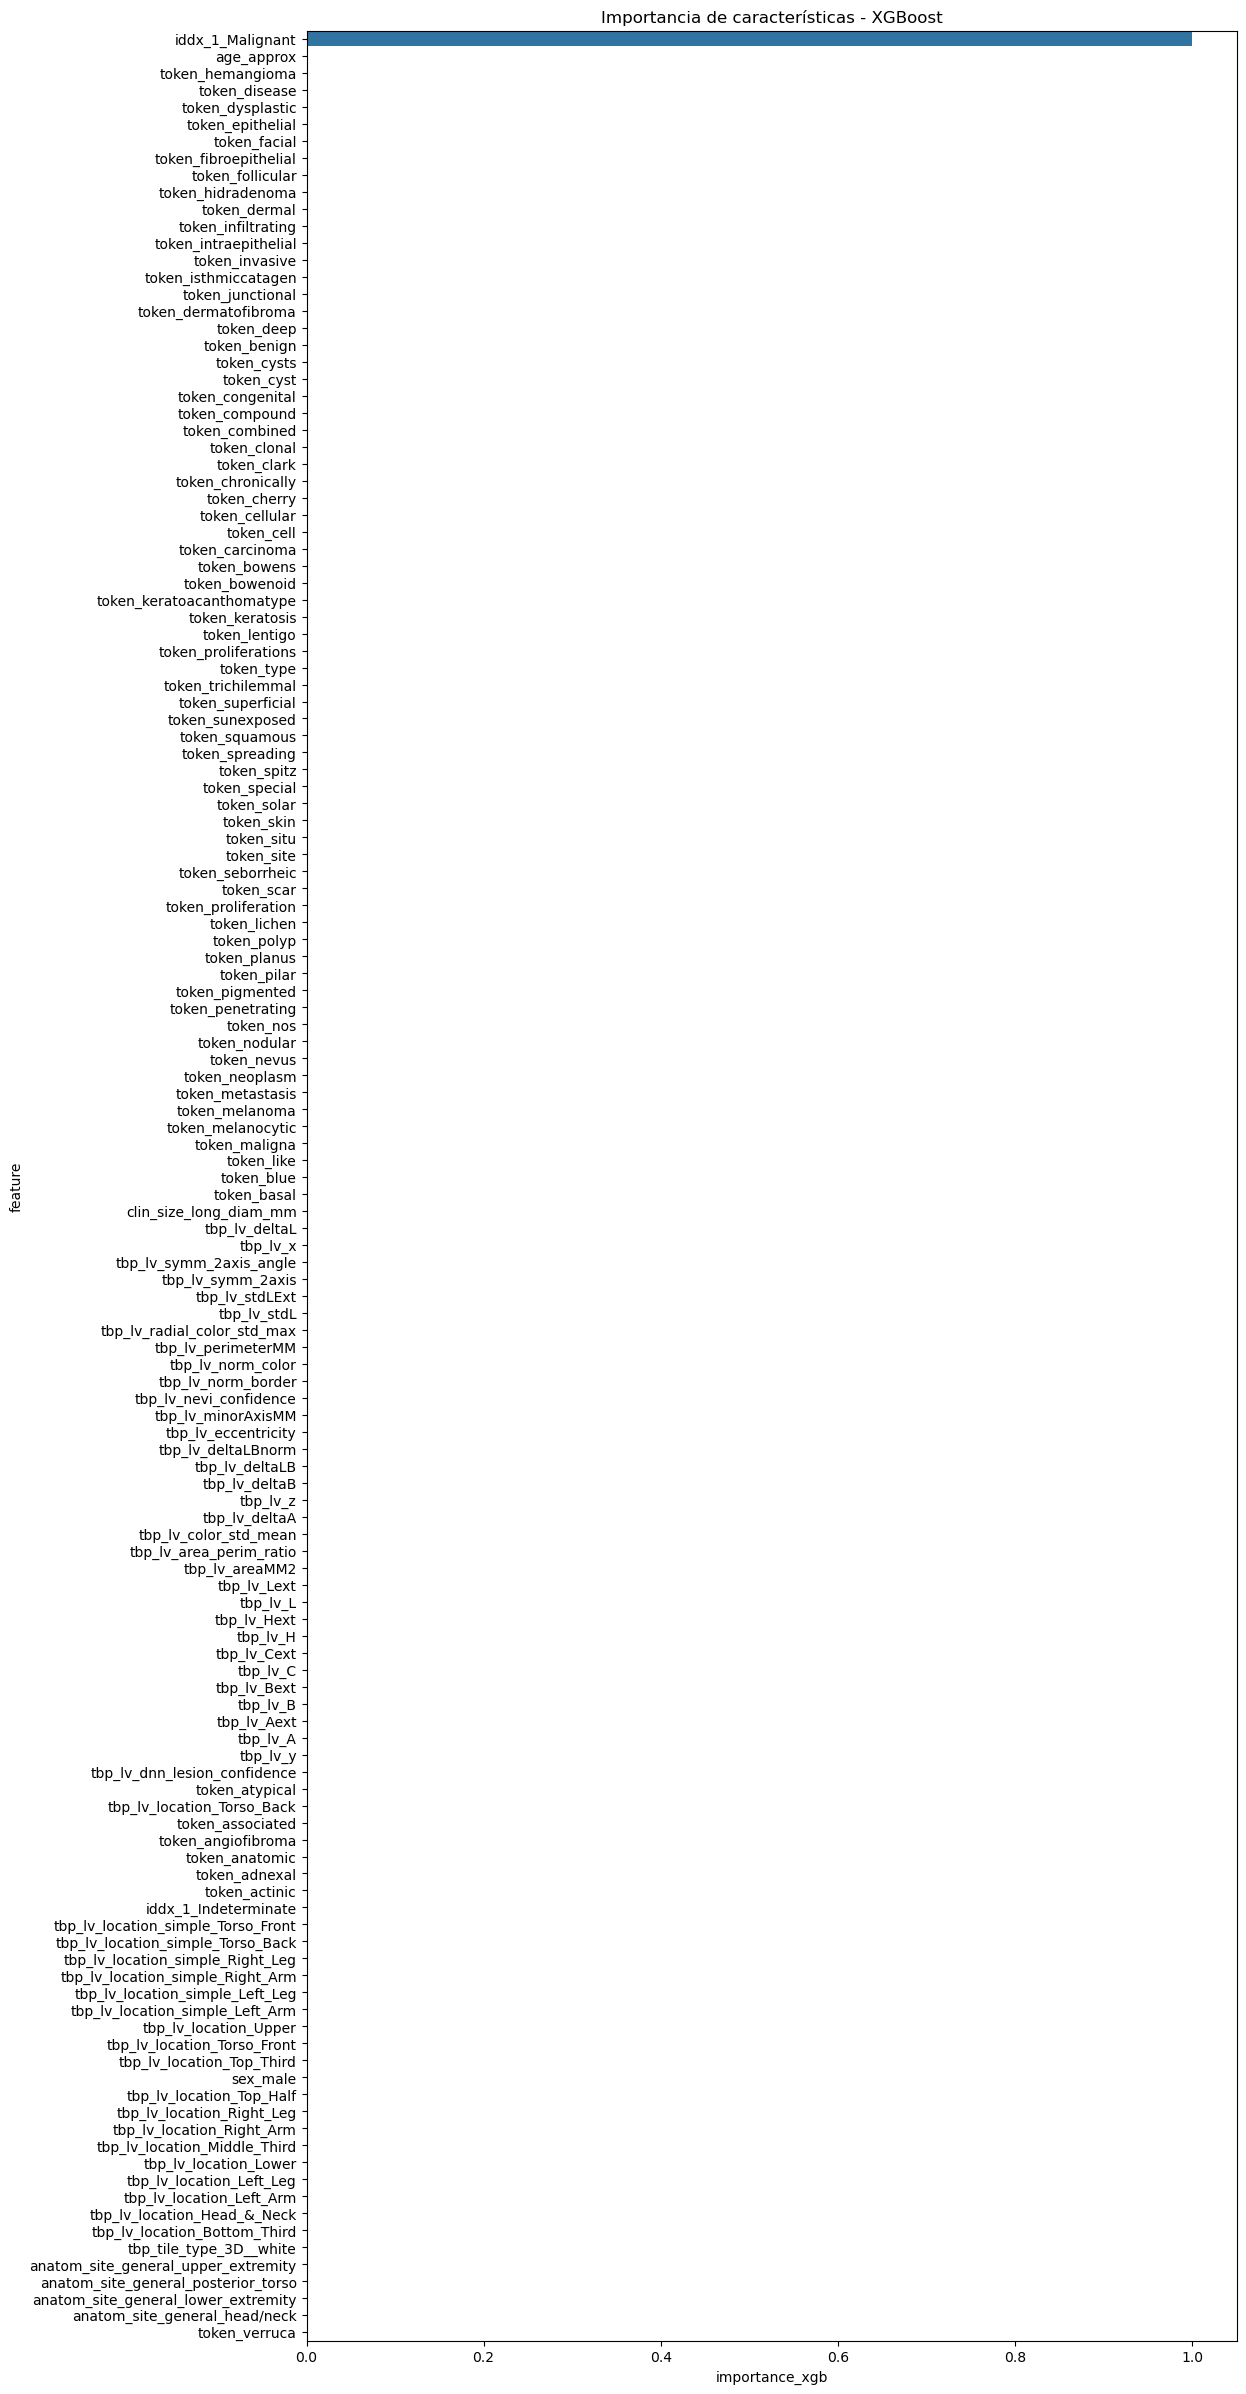

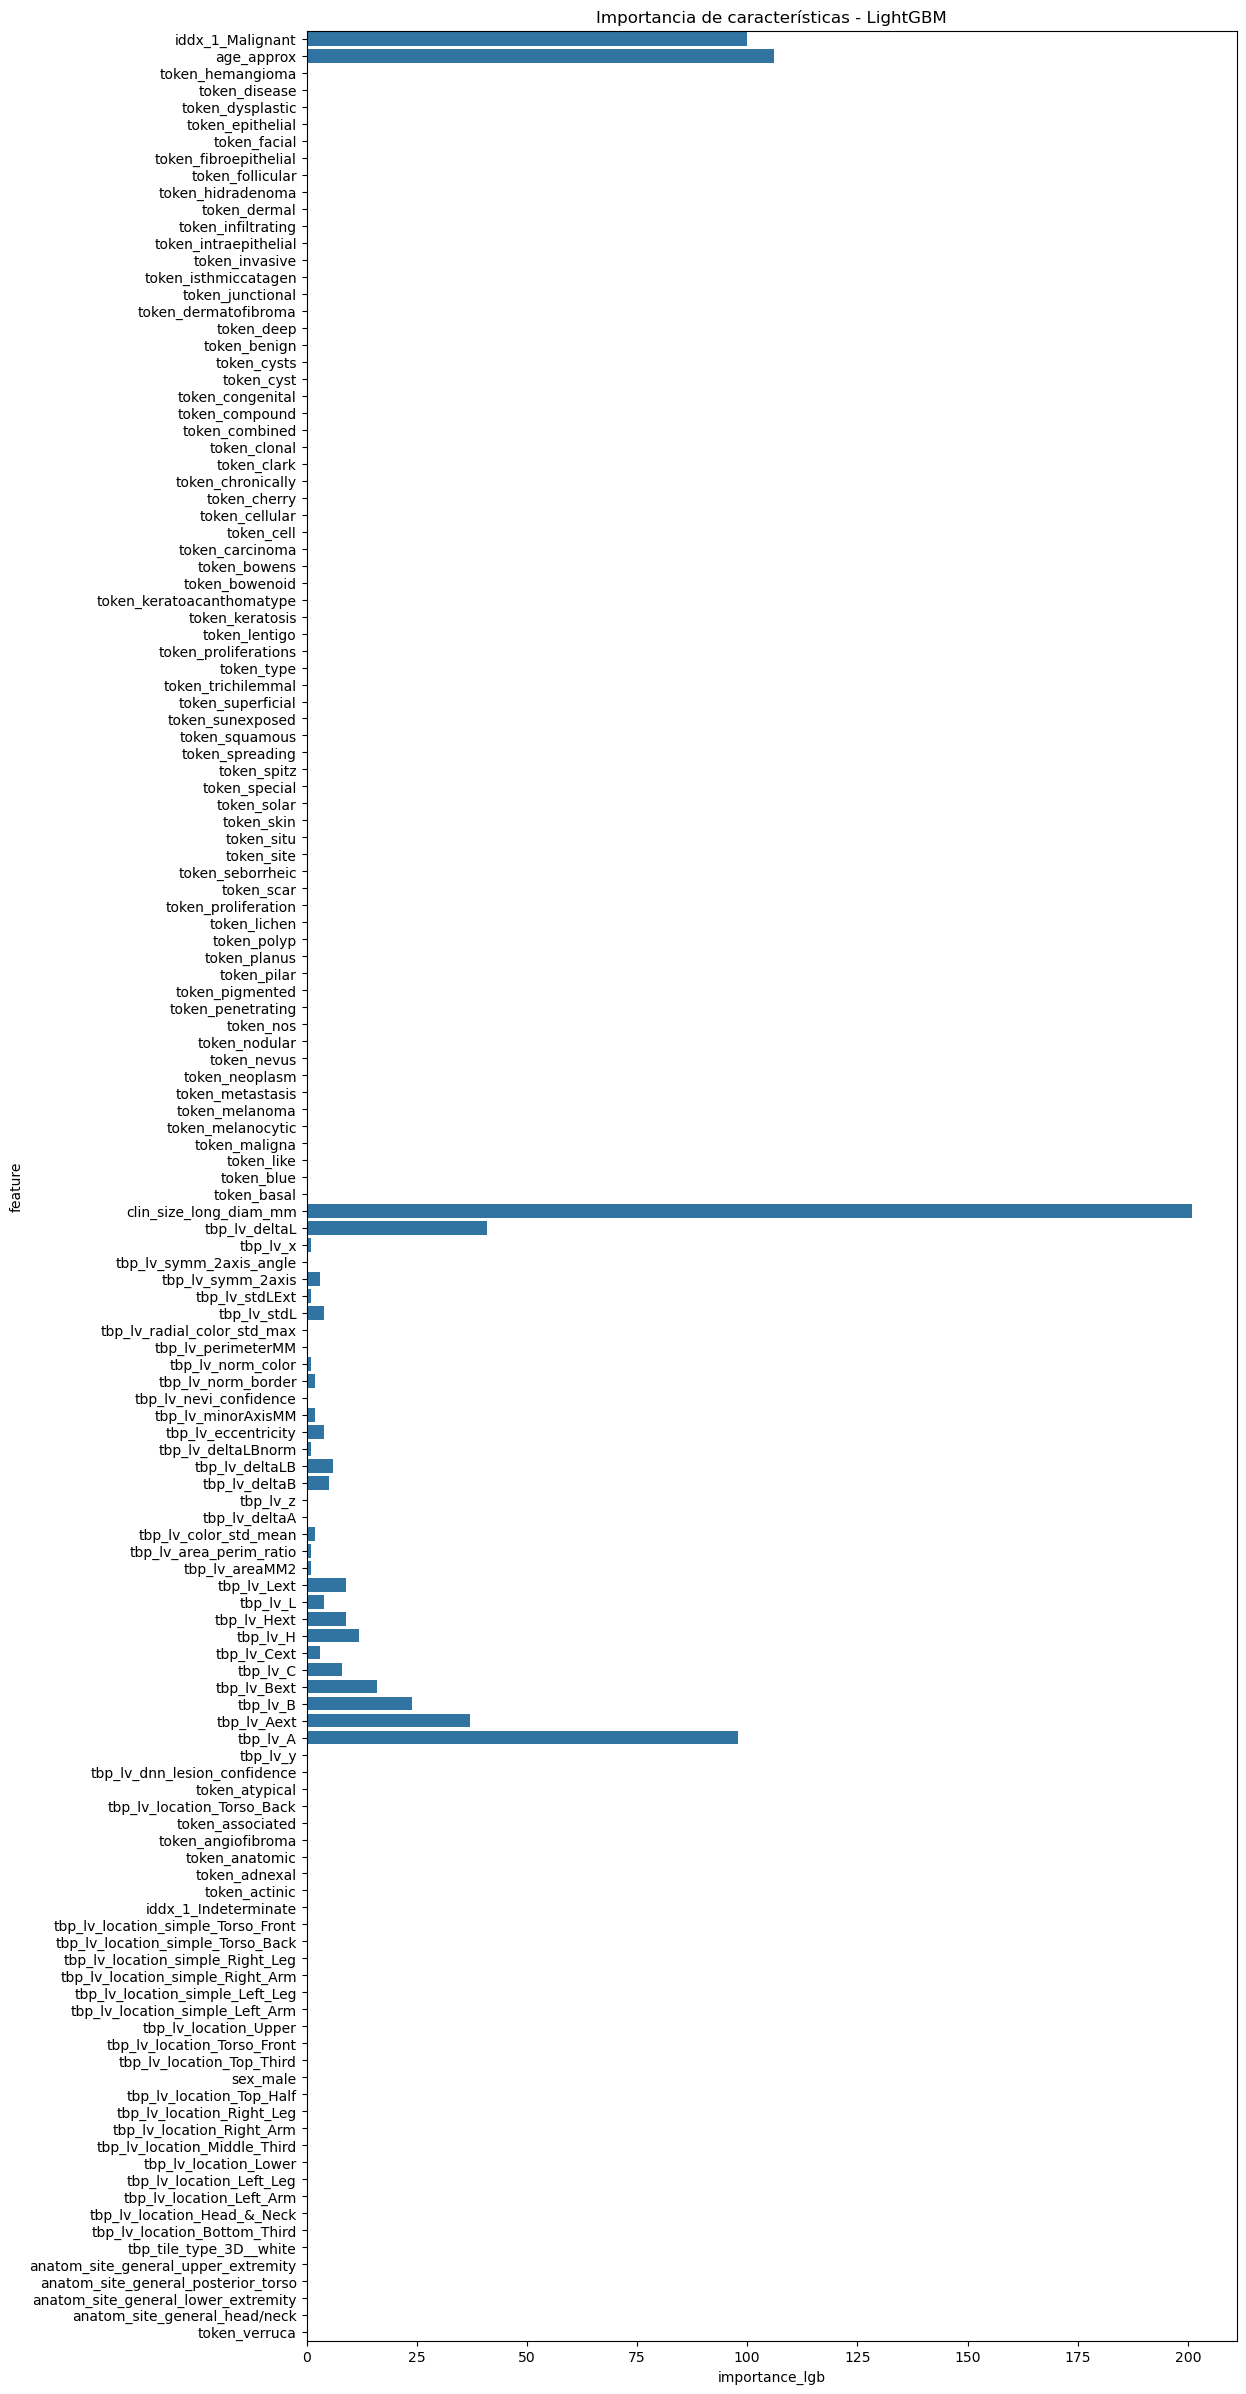

In [33]:

# Obtener la importancia de características para XGBoost
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
})

# Obtener la importancia de características para LightGBM
lgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb.feature_importances_
})

# Puedes combinar las importancias o analizarlas por separado
# Unir ambos en un único DataFrame si lo prefieres
importance_df = pd.concat([xgb_importance, lgb_importance], axis=1)
importance_df.columns = ['feature', 'importance_xgb', 'feature_lgb', 'importance_lgb']

# Ordenar por importancia (puedes hacerlo por cualquier modelo)
importance_df = importance_df.sort_values(by='importance_xgb', ascending=False)

# Graficar usando seaborn
plt.figure(figsize=(12, 30))
sns.barplot(x='importance_xgb', y='feature', data=importance_df)
plt.title('Importancia de características - XGBoost')
plt.show()

plt.figure(figsize=(12,30))
sns.barplot(x='importance_lgb', y='feature', data=importance_df)
plt.title('Importancia de características - LightGBM')
plt.show()

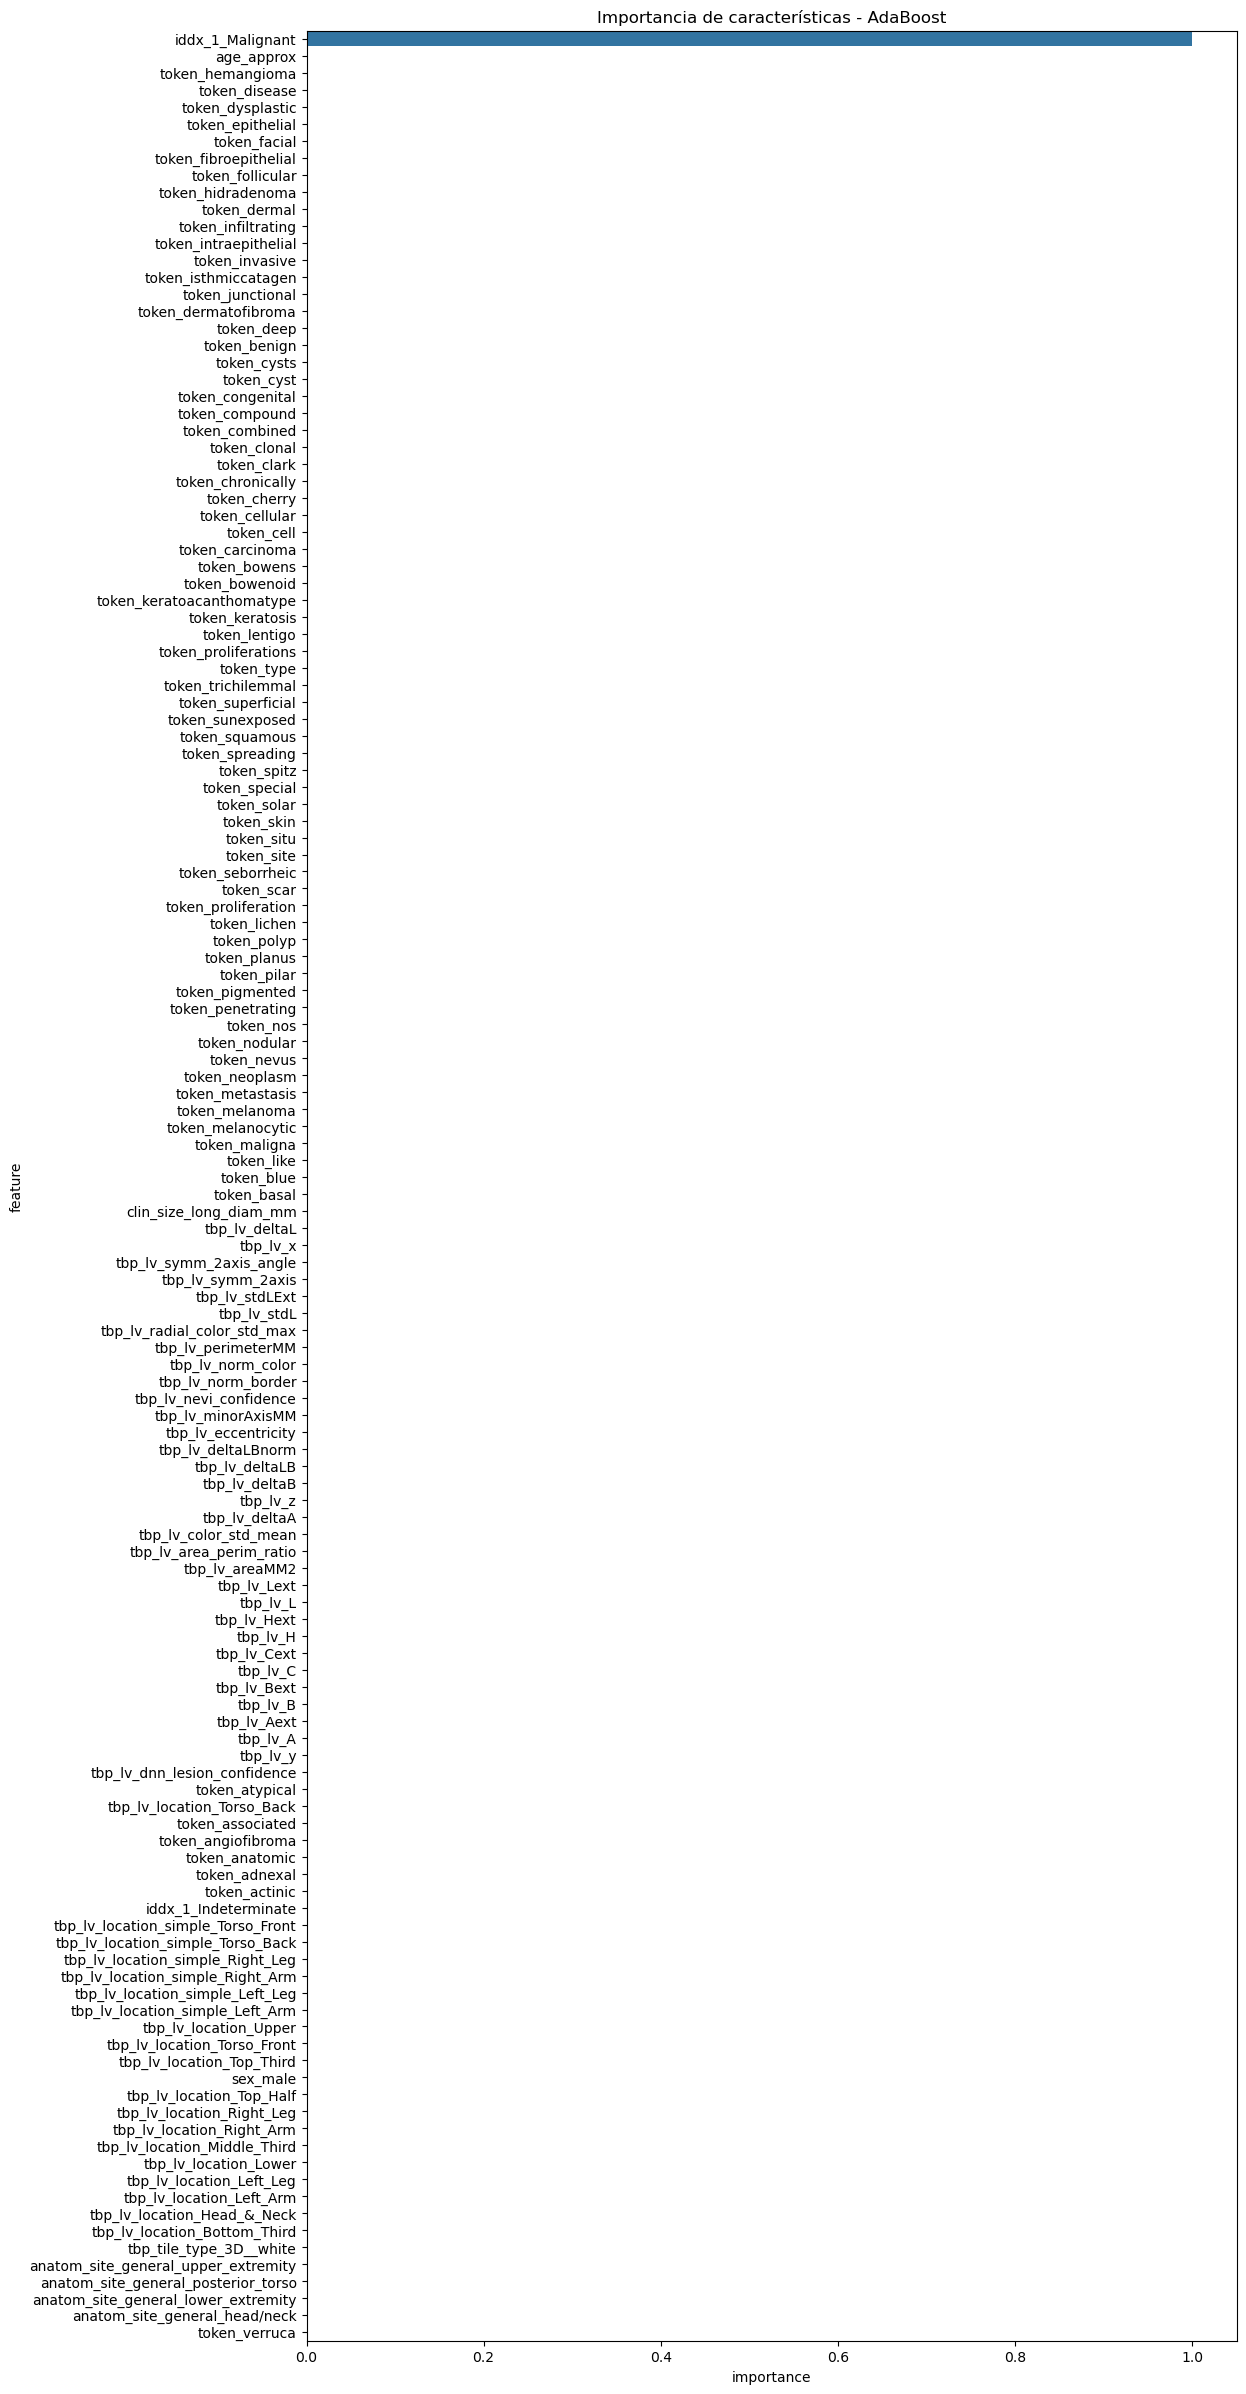

In [21]:

# Obtener la importancia de características para AdaBoost
ada_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': ada.feature_importances_
})

# Ordenar por importancia
ada_importance = ada_importance.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(12, 30))
sns.barplot(x='importance', y='feature', data=ada_importance)
plt.title('Importancia de características - AdaBoost')
plt.show()

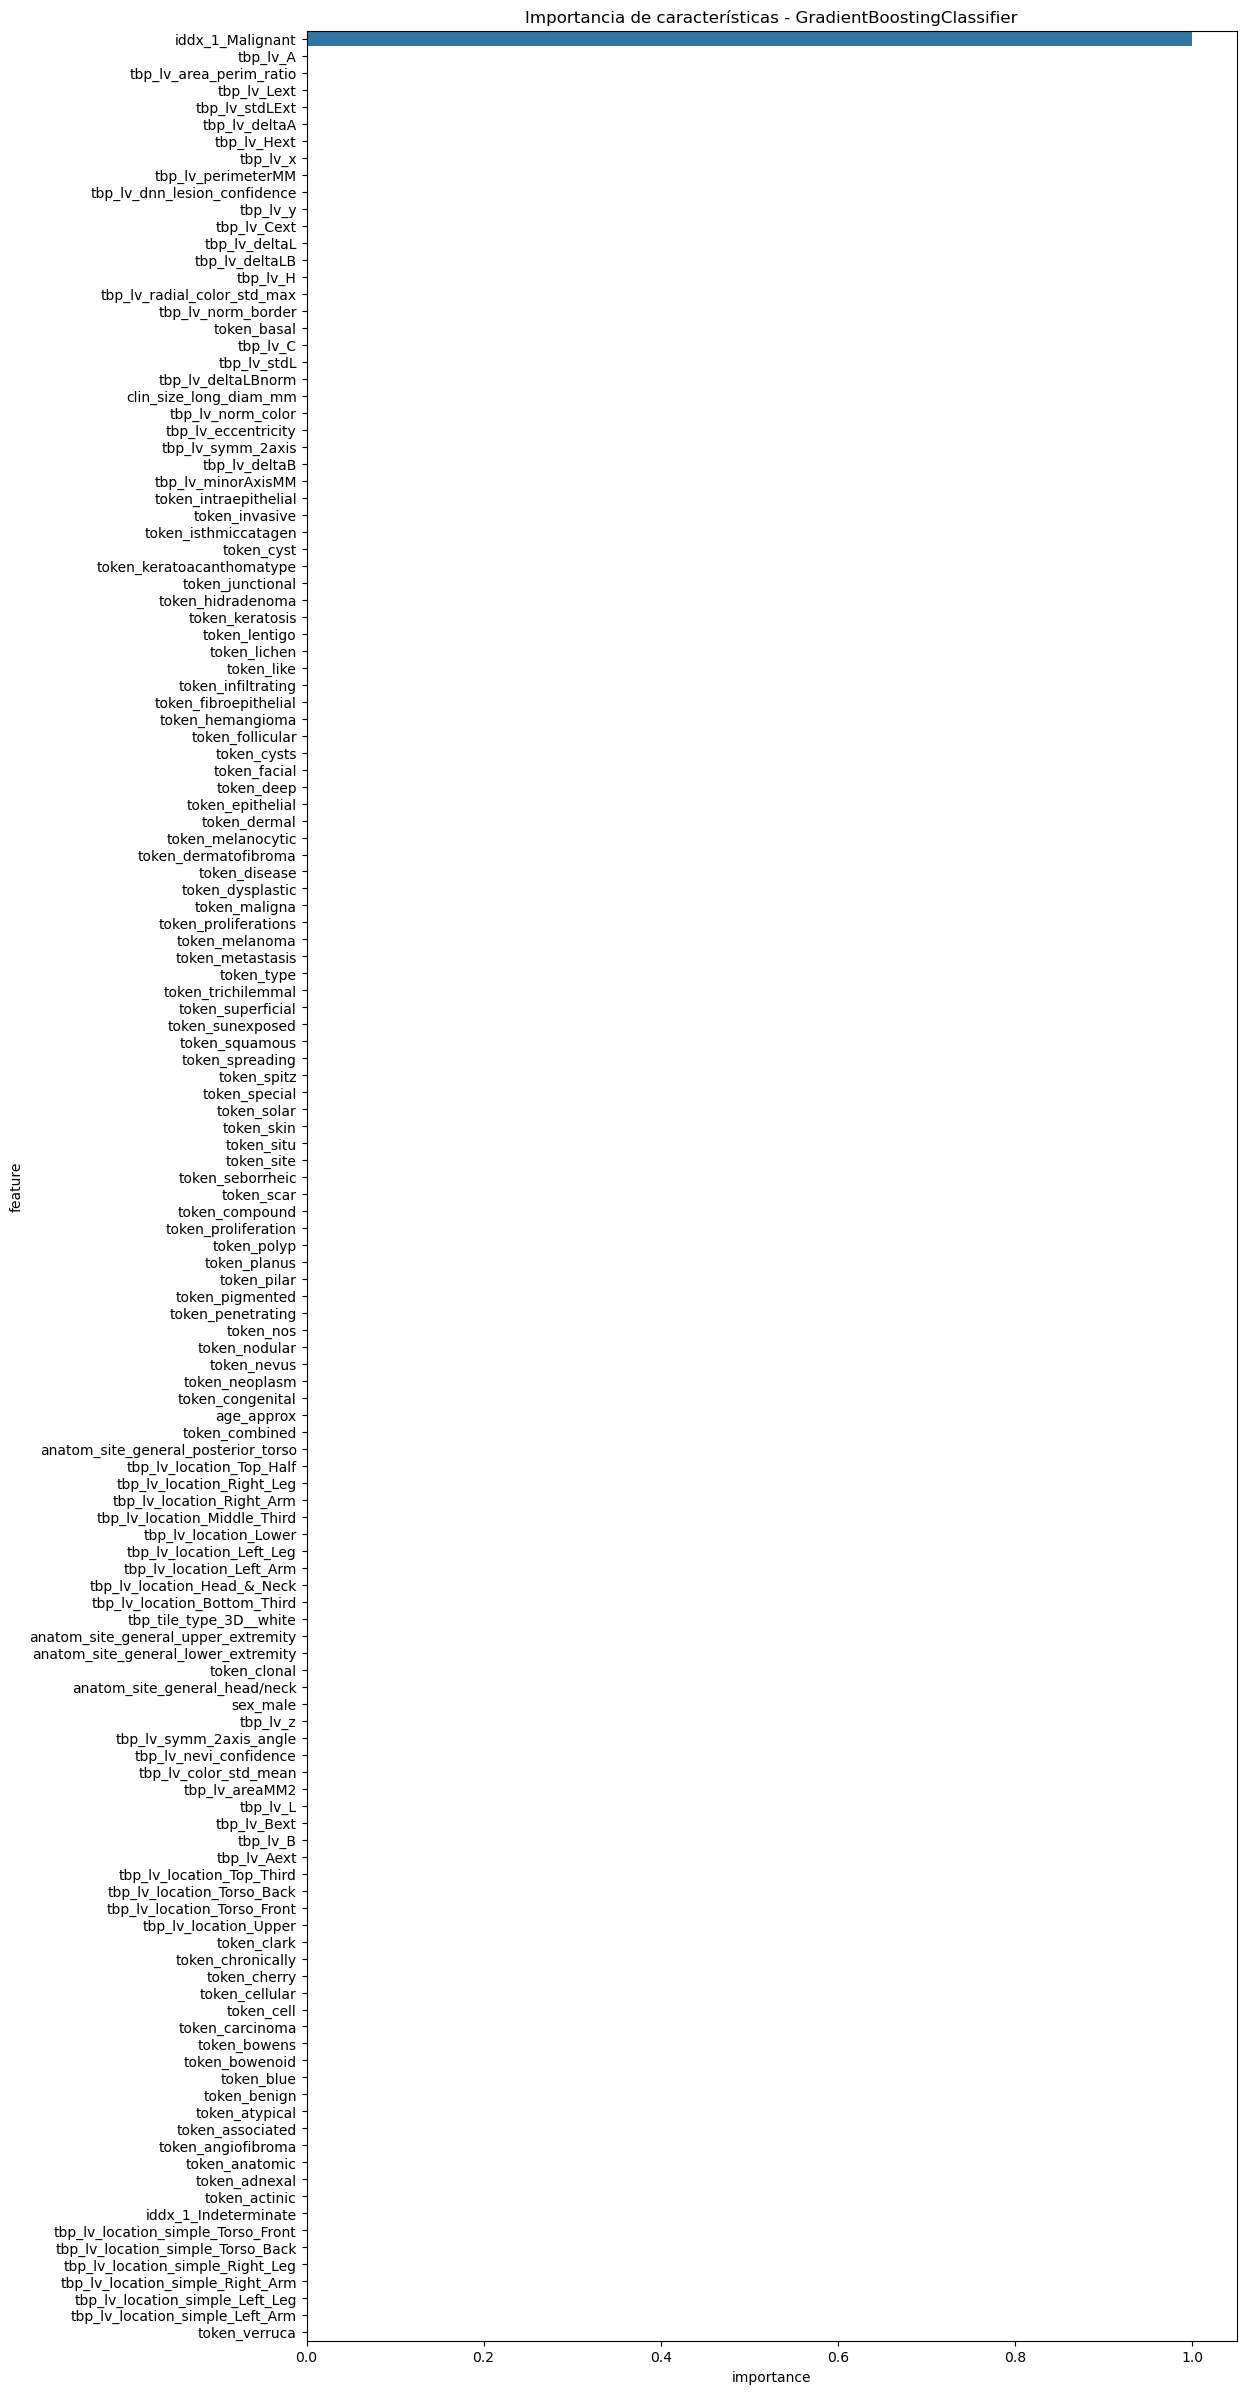

In [23]:
# Obtener la importancia de características para GradientBoostingClassifier
gb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gb.feature_importances_
})

# Ordenar por importancia
gb_importance = gb_importance.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(12, 30))
sns.barplot(x='importance', y='feature', data=gb_importance)
plt.title('Importancia de características - GradientBoostingClassifier')
plt.show()

como vemos, la variable con mayor peso en el entrenamiento de los 4 modelos es "iddx_1_malingnant" y tras comprobar que todos los modelos tienen un accuracy de 1.0 tanto en train como en test, vamos a verificar la similitud en ambas variables, para eso usaremos:

Correlación de Pearson: Esta métrica te indicará qué tan linealmente relacionadas están las dos variables. Un valor cercano a 1 indica una fuerte relación positiva.

Índice de Jaccard: Este índice te mostrará la proporción de coincidencias en 1 (True). Un valor de 1 indica que ambas variables coinciden perfectamente en todos los casos en los que una de las variables es 1.

In [36]:

# Convertir 'True' a 1 y 'False' a 0 en 'idx_1_malignant'
metadata_processed['iddx_1_Malignant'] = metadata_processed['iddx_1_Malignant'].astype(int)

# 1. Calcular la correlación de Pearson
correlation = metadata_processed['target'].corr(metadata_processed['iddx_1_Malignant'])
print(f"Correlación de Pearson entre 'target' y 'iddx_1_Malignant': {correlation:.2f}")

# 2. Calcular el índice de Jaccard
jaccard = jaccard_score(metadata_processed['target'], metadata_processed['iddx_1_Malignant'])
print(f"Índice de similitud de Jaccard entre 'target' y 'idx_1_malignant': {jaccard:.2f}")

# 3. Calcular la similitud porcentual
similarities = (metadata_processed['target'] == metadata_processed['iddx_1_Malignant']).sum()
total = len(metadata_processed)
similarity_percentage = similarities / total * 100
print(f"Similitud porcentual entre 'target' y 'iddx_1_Malignant': {similarity_percentage:.2f}%")

Correlación de Pearson entre 'target' y 'iddx_1_Malignant': 1.00
Índice de similitud de Jaccard entre 'target' y 'idx_1_malignant': 1.00
Similitud porcentual entre 'target' y 'iddx_1_Malignant': 100.00%


Tras ver que son exactamente iguales, y como es logico la eliminaremos del conjunto train para que el modlo no la use como aprendizaje

In [38]:
# Eliminar la columna 'iddx_1_Malignant' de los conjuntos de entrenamiento y prueba

X_train = X_train.drop('iddx_1_Malignant', axis=1)
X_test = X_test.drop('iddx_1_Malignant', axis=1)

# Confirmar que la columna ha sido eliminada
print("Datos en X_train después de la eliminación:", X_train.shape)
print("Datos en X_test después de la eliminación:", X_test.shape)

KeyError: "['iddx_1_Malignant'] not found in axis"

In [40]:
X_train.shape

(305531, 135)

Volveos a entrenar los modelos, dspues de la verificacion...

In [41]:
# modelos
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
gb =GradientBoostingClassifier (n_estimators=100, learning_rate=0.01, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state = 42, use_label_encoder=False, eval_metric='mlogloss')
lgb = LGBMClassifier(n_estimators=100, learning_rate=0.01, random_state = 42, verbose=-1)

#modelos con valores por defecto
'''ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()'''

# entrenamiento
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)


LGBMClassifier(learning_rate=0.01, random_state=42, verbose=-1)

In [42]:
# hacemos la prediccion
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

In [43]:
#revisamos metricas
ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_accuracy_train = accuracy_score(y_train, ada_y_pred_train)

gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)

xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)

lgb_accuracy_test = accuracy_score(y_test, lgb_y_pred_test)
lgb_accuracy_train = accuracy_score(y_train, lgb_y_pred_train)

print('AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)

print('Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)

print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)

print('LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)

AdaBoost
Accuracy Test:  1.0
Accuracy Train:  1.0
Gradient Boosting
Accuracy Test:  1.0
Accuracy Train:  1.0
XGBoost
Accuracy Test:  1.0
Accuracy Train:  1.0
LightGBM
Accuracy Test:  1.0
Accuracy Train:  1.0


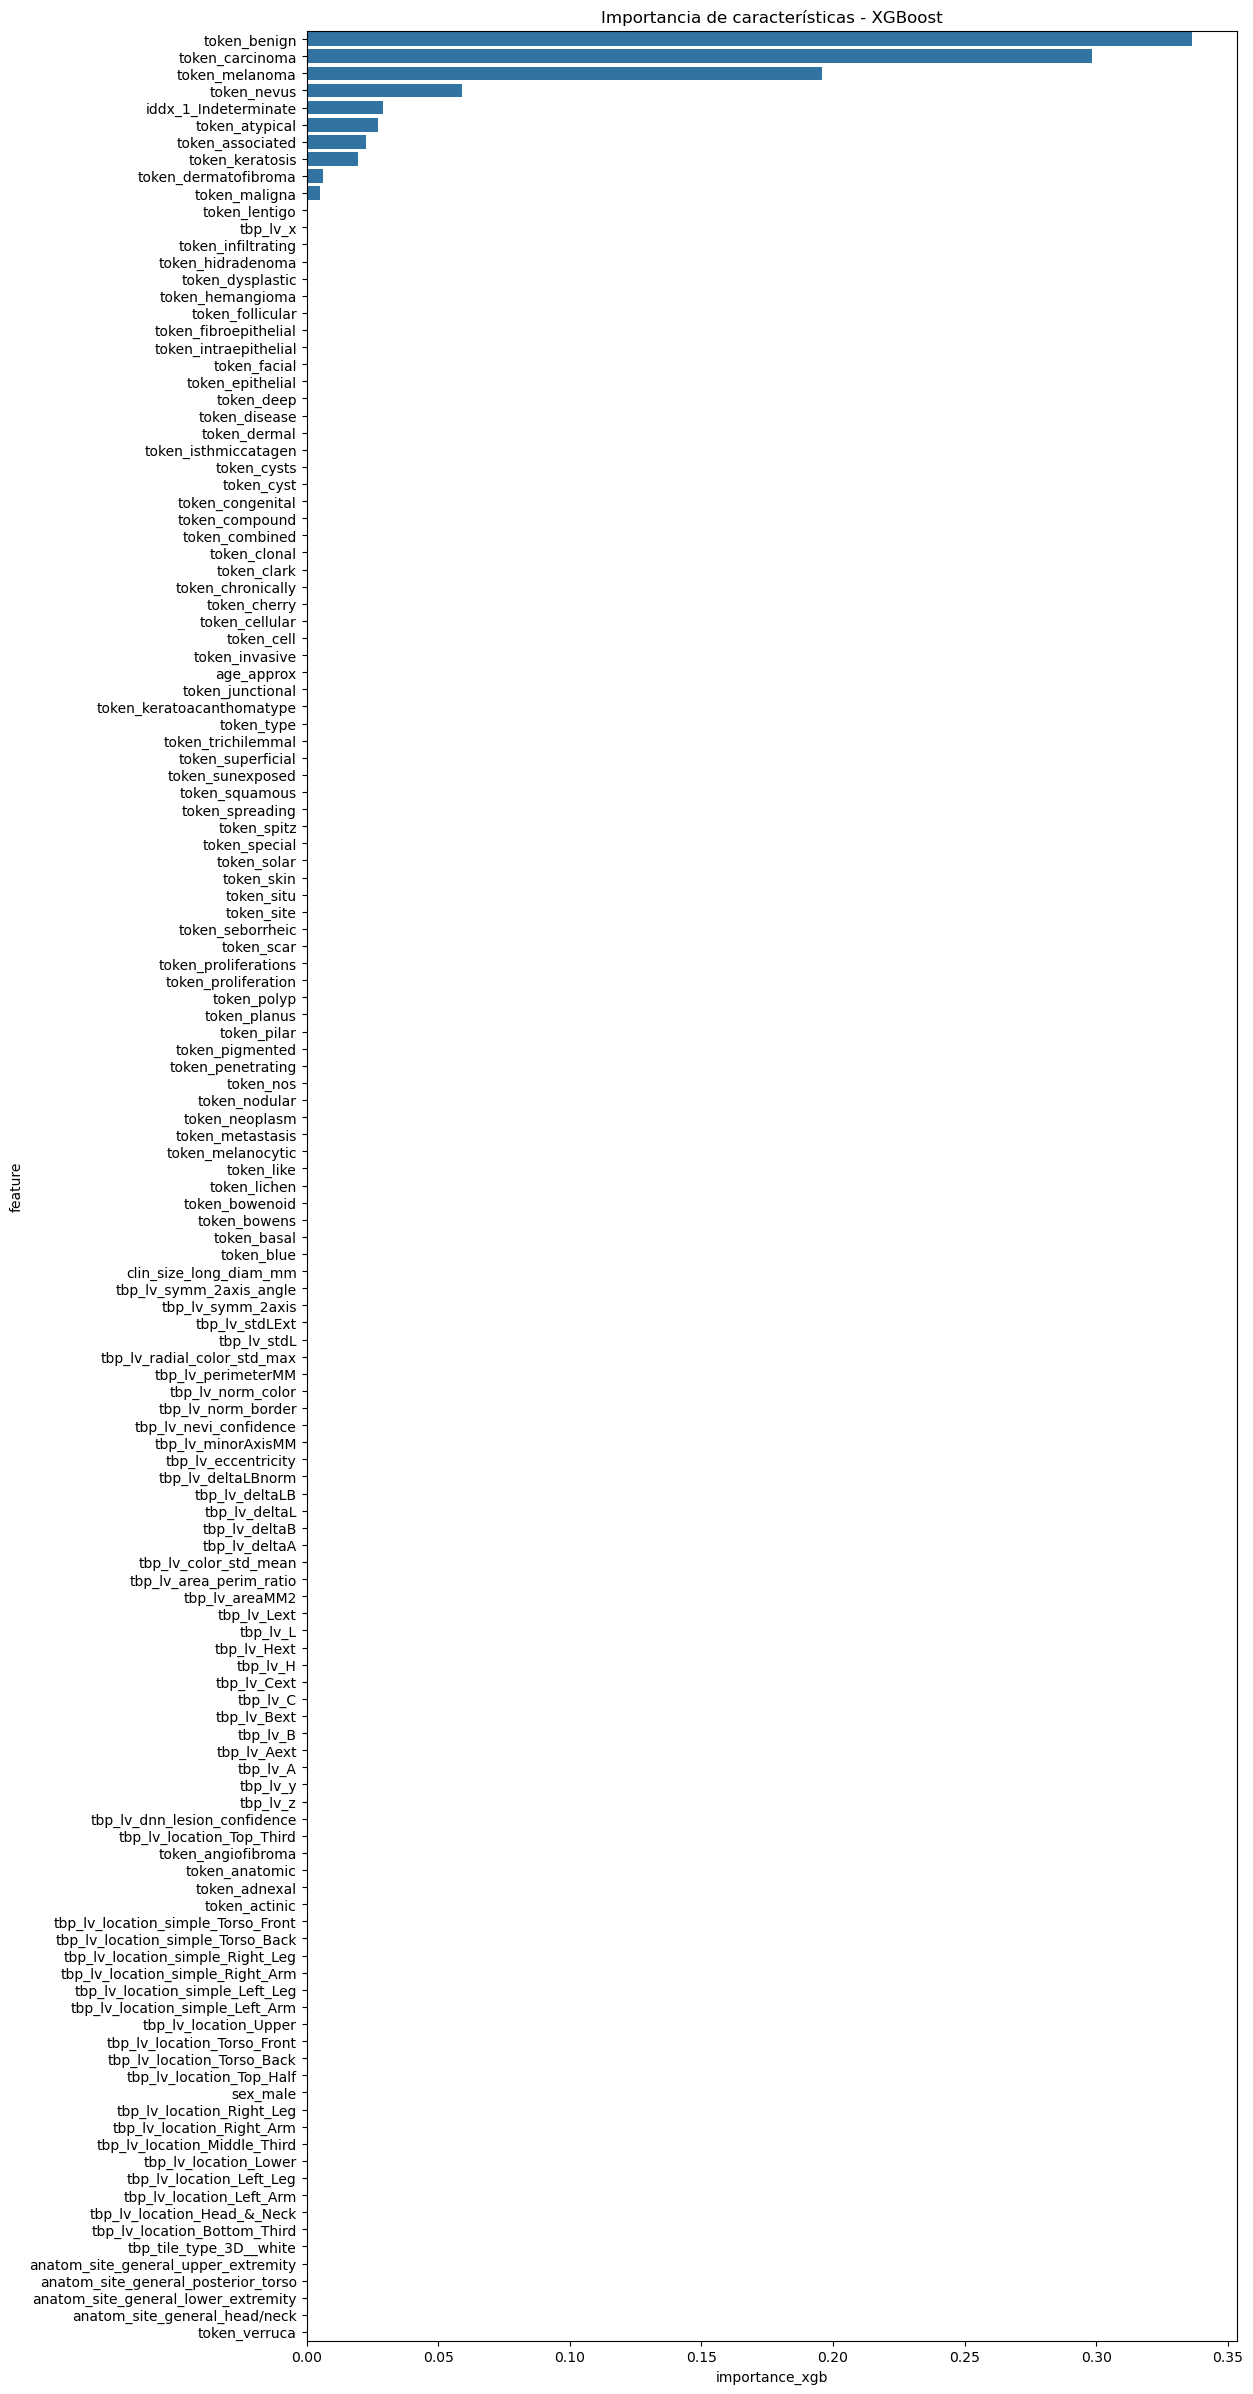

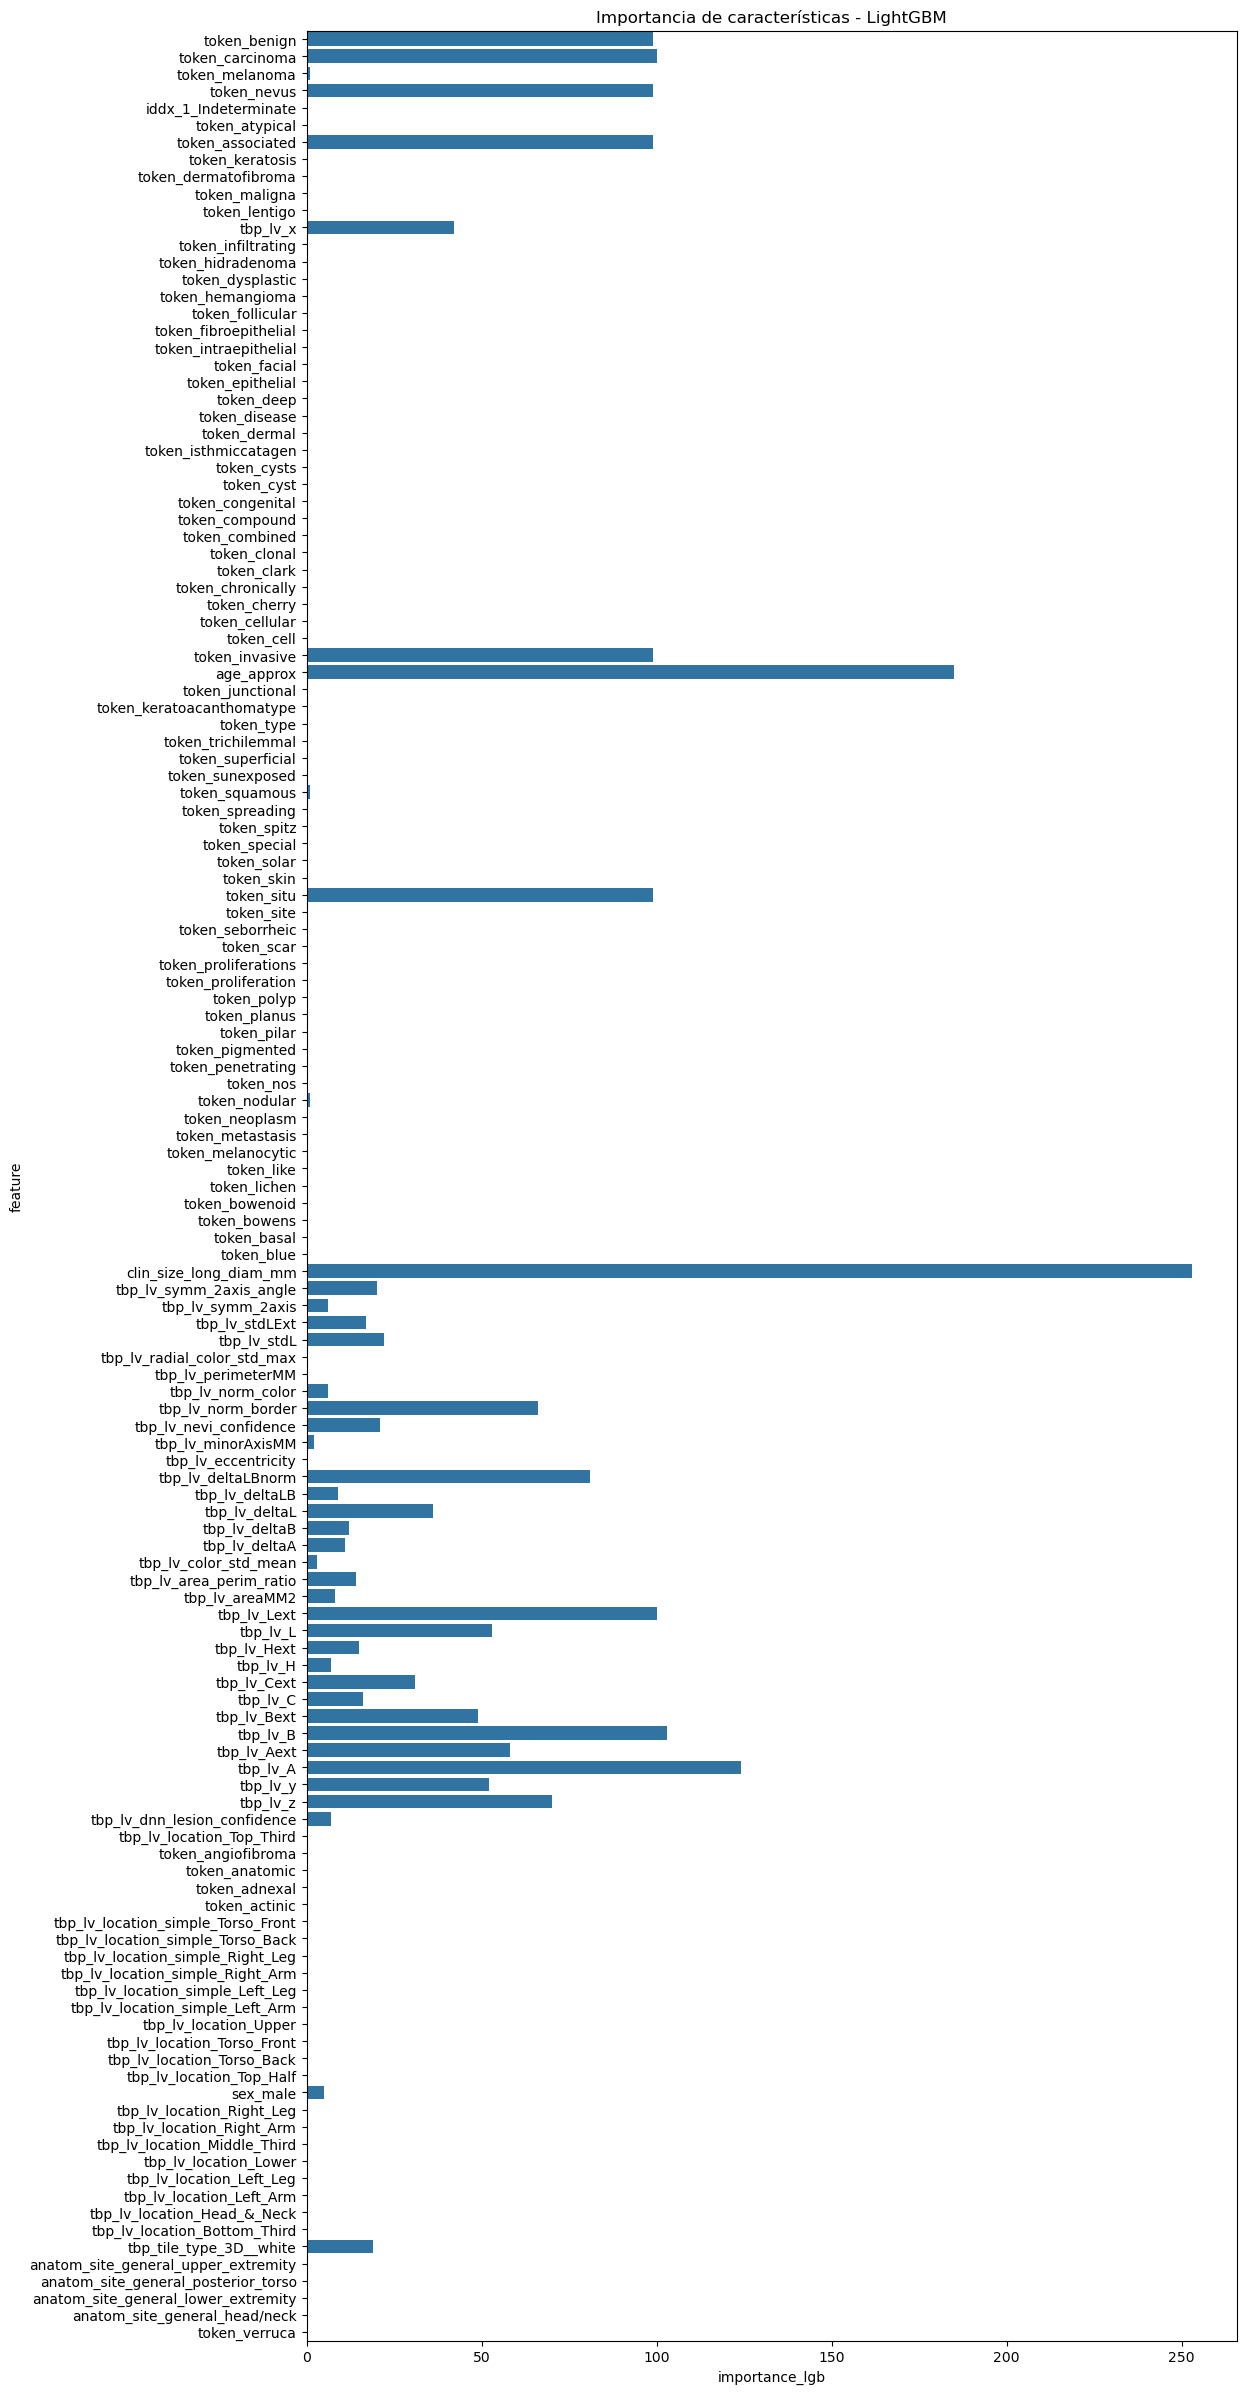

In [44]:


# Obtener la importancia de características para XGBoost
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
})

# Obtener la importancia de características para LightGBM
lgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb.feature_importances_
})

# Puedes combinar las importancias o analizarlas por separado
# Unir ambos en un único DataFrame si lo prefieres
importance_df = pd.concat([xgb_importance, lgb_importance], axis=1)
importance_df.columns = ['feature', 'importance_xgb', 'feature_lgb', 'importance_lgb']

# Ordenar por importancia (puedes hacerlo por cualquier modelo)
importance_df = importance_df.sort_values(by='importance_xgb', ascending=False)

# Graficar usando seaborn
plt.figure(figsize=(12, 30))
sns.barplot(x='importance_xgb', y='feature', data=importance_df)
plt.title('Importancia de características - XGBoost')
plt.show()

plt.figure(figsize=(12,30))
sns.barplot(x='importance_lgb', y='feature', data=importance_df)
plt.title('Importancia de características - LightGBM')
plt.show()

Explicación del código actualizado:

	1.	Filtro de columnas:
	•	Solo se seleccionan las columnas que son booleanas (True/False) o que contienen exclusivamente valores 0 y 1.
	•	Esto se verifica con set(metadata_processed[column].unique()).issubset({0, 1}), que comprueba si todos los valores únicos de la columna están dentro del conjunto {0, 1}.
	2.	Conversión de booleanos: Se convierten las columnas booleanas a enteros (0/1) para que las métricas funcionen correctamente.
	3.	Cálculo de métricas:
	•	Se calculan las mismas métricas (Correlación de Pearson, índice de Jaccard y similitud porcentual) solo para las columnas seleccionadas.
	4.	Resultados ordenados: Los resultados se ordenan por la similitud porcentual para identificar las columnas más similares a target.

Este enfoque asegura que solo se verifiquen las columnas que tienen el potencial de ser similares a la variable target, evitando el procesamiento innecesario de columnas que no tienen relevancia en este contexto.

In [45]:

# Crear un DataFrame para almacenar los resultados
results = []

# Iterar sobre cada columna en el DataFrame original
for column in metadata_processed.columns:
    if column != 'target':
        # Seleccionar solo columnas booleanas o con valores 0 y 1
        if metadata_processed[column].dtype == 'bool' or \
           set(metadata_processed[column].unique()).issubset({0, 1}):
            
            # Si la columna es booleana (True/False), convertirla a 0/1
            if metadata_processed[column].dtype == 'bool':
                metadata_processed[column] = metadata_processed[column].astype(int)
            
            # Calcular la correlación de Pearson
            correlation = metadata_processed['target'].corr(metadata_processed[column])
            
            # Calcular el índice de Jaccard
            try:
                jaccard = jaccard_score(metadata_processed['target'], metadata_processed[column])
            except ValueError:
                jaccard = None  # Si hay un error, asignar None (por ejemplo, si la columna no tiene valores 1)
            
            # Calcular la similitud porcentual
            similarities = (metadata_processed['target'] == metadata_processed[column]).sum()
            total = len(metadata_processed)
            similarity_percentage = similarities / total * 100
            
            # Almacenar los resultados
            results.append({
                'column': column,
                'correlation': correlation,
                'jaccard': jaccard,
                'similarity_percentage': similarity_percentage
            })

# Convertir los resultados a un DataFrame para una mejor visualización
results_df = pd.DataFrame(results)

# Mostrar los resultados ordenados por la similitud porcentual
results_df = results_df.sort_values(by='similarity_percentage', ascending=False)
print(results_df)

                                 column  correlation   jaccard  \
26                     iddx_1_Malignant     1.000000  1.000000   
39                           token_cell     0.776811  0.603675   
38                      token_carcinoma     0.776811  0.603675   
33                          token_basal     0.641741  0.412073   
73                       token_melanoma     0.629354  0.396325   
..                                  ...          ...       ...   
5               tbp_tile_type_3D__white     0.014675  0.001704   
23    tbp_lv_location_simple_Torso_Back    -0.003151  0.000847   
3   anatom_site_general_posterior_torso    -0.003151  0.000847   
0                              sex_male     0.002441  0.001050   
34                         token_benign    -0.611260  0.000000   

    similarity_percentage  
26             100.000000  
39              99.960462  
38              99.960462  
33              99.941348  
73              99.939777  
..                    ...  
5          

debido a la muestra de los analisis anteriores eliminaremos todas las variables tokenizadas por su correlacion 1:1 con l avariable target

In [46]:
# Identificar columnas que empiezan con 'token_'
columns_to_drop = X_train.filter(like='token_').columns

# Eliminar estas columnas de los conjuntos de entrenamiento y prueba
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Confirmar que las columnas se han eliminado
print(f"Columnas eliminadas: {list(columns_to_drop)}")
print("Número de columnas restantes en X_train:", X_train.shape[1])
print("Número de columnas restantes en X_test:", X_test.shape[1])

Columnas eliminadas: ['token_actinic', 'token_adnexal', 'token_anatomic', 'token_angiofibroma', 'token_associated', 'token_atypical', 'token_basal', 'token_benign', 'token_blue', 'token_bowenoid', 'token_bowens', 'token_carcinoma', 'token_cell', 'token_cellular', 'token_cherry', 'token_chronically', 'token_clark', 'token_clonal', 'token_combined', 'token_compound', 'token_congenital', 'token_cyst', 'token_cysts', 'token_deep', 'token_dermal', 'token_dermatofibroma', 'token_disease', 'token_dysplastic', 'token_epithelial', 'token_facial', 'token_fibroepithelial', 'token_follicular', 'token_hemangioma', 'token_hidradenoma', 'token_infiltrating', 'token_intraepithelial', 'token_invasive', 'token_isthmiccatagen', 'token_junctional', 'token_keratoacanthomatype', 'token_keratosis', 'token_lentigo', 'token_lichen', 'token_like', 'token_maligna', 'token_melanocytic', 'token_melanoma', 'token_metastasis', 'token_neoplasm', 'token_nevus', 'token_nodular', 'token_nos', 'token_penetrating', 'token

In [47]:
# reentrenamos modelos
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
gb =GradientBoostingClassifier (n_estimators=100, learning_rate=0.01, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state = 42, use_label_encoder=False, eval_metric='mlogloss')
lgb = LGBMClassifier(n_estimators=100, learning_rate=0.01, random_state = 42, verbose=-1)

#modelos con valores por defecto
'''ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()'''

# entrenamiento
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, random_state=42, verbose=-1)

In [48]:
# hacemos la prediccion
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

In [49]:
#revisamos metricas
ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_accuracy_train = accuracy_score(y_train, ada_y_pred_train)

gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)

xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)

lgb_accuracy_test = accuracy_score(y_test, lgb_y_pred_test)
lgb_accuracy_train = accuracy_score(y_train, lgb_y_pred_train)

print('AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)

print('Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)

print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)

print('LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)

AdaBoost
Accuracy Test:  0.9989919222863726
Accuracy Train:  0.9990050109481525
Gradient Boosting
Accuracy Test:  0.9989788303680138
Accuracy Train:  0.9990181029093611
XGBoost
Accuracy Test:  0.9989919222863726
Accuracy Train:  0.9990050109481525
LightGBM
Accuracy Test:  0.9989395546129375
Accuracy Train:  0.9990311948705696


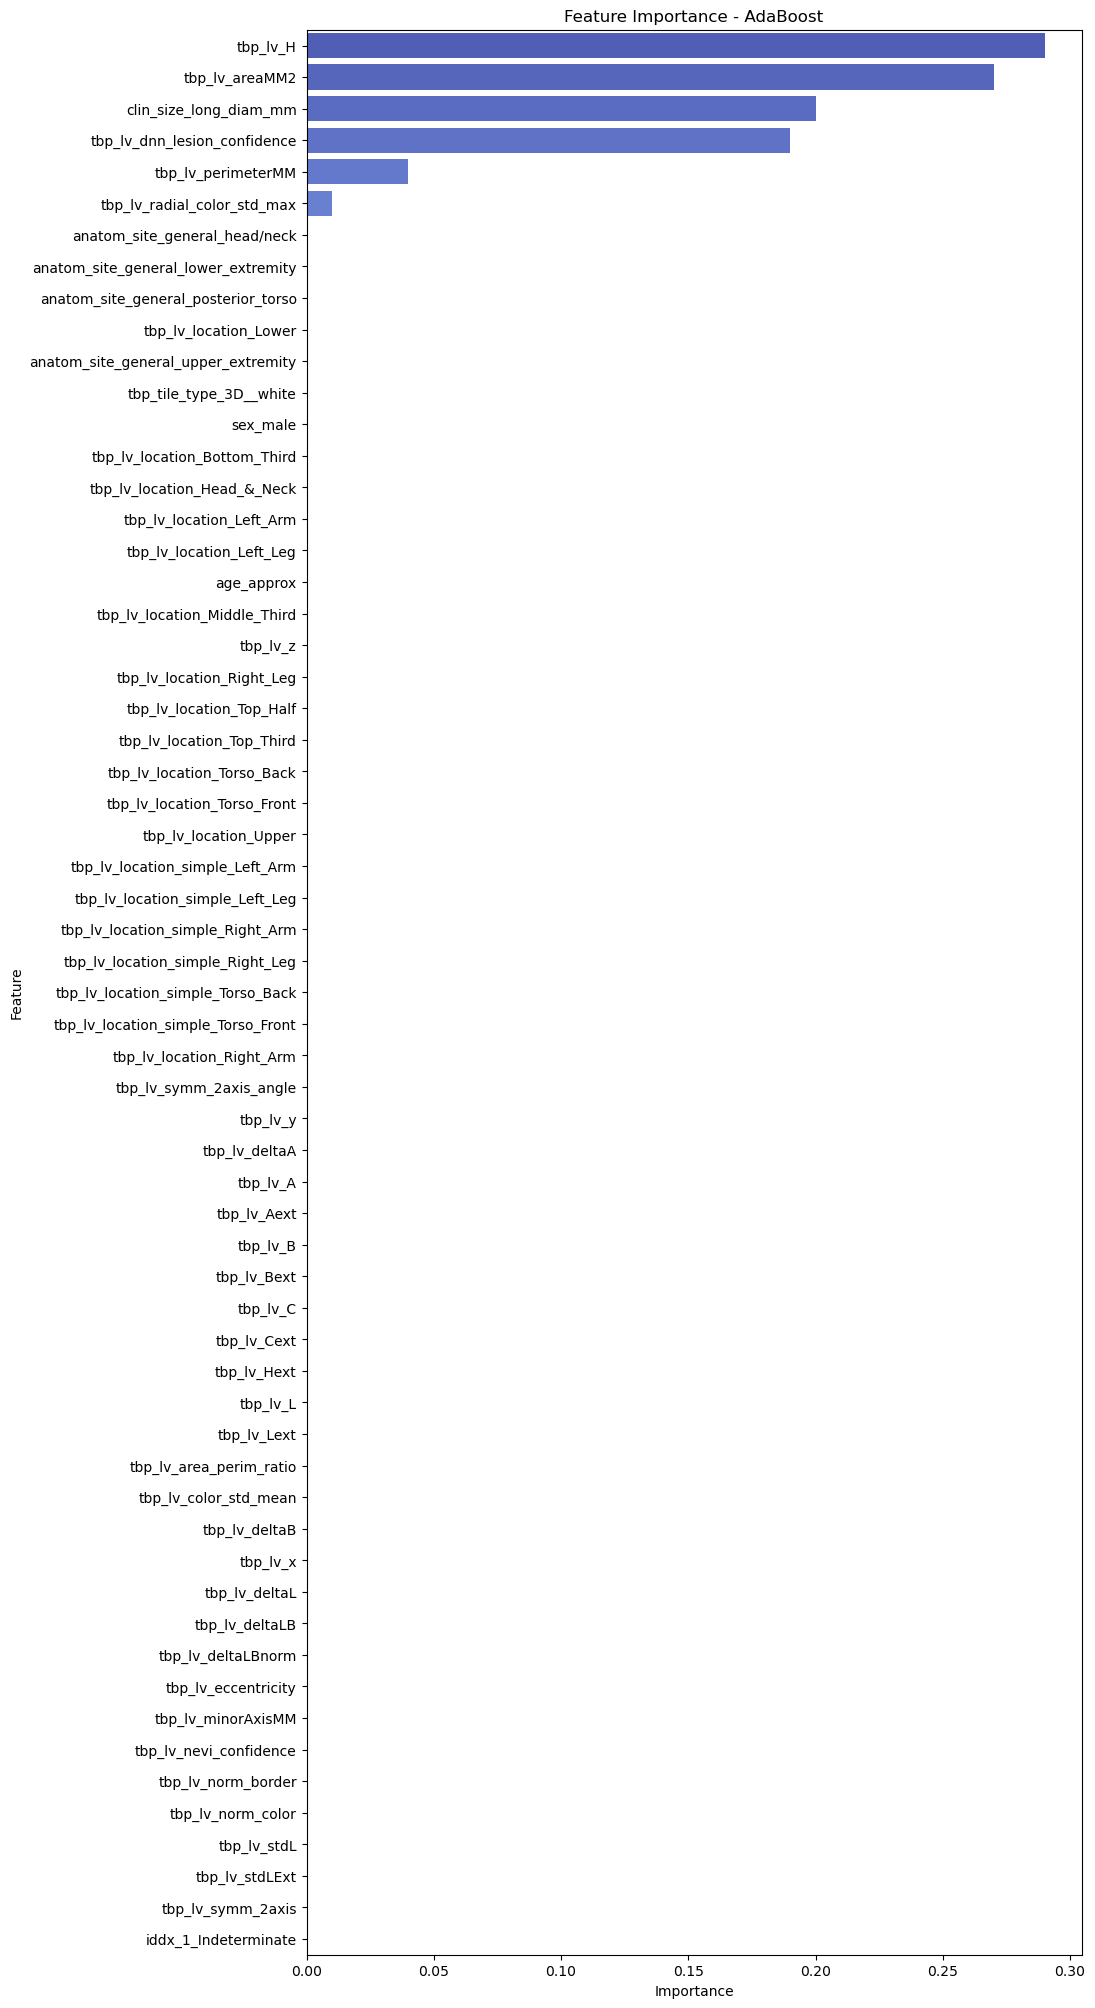

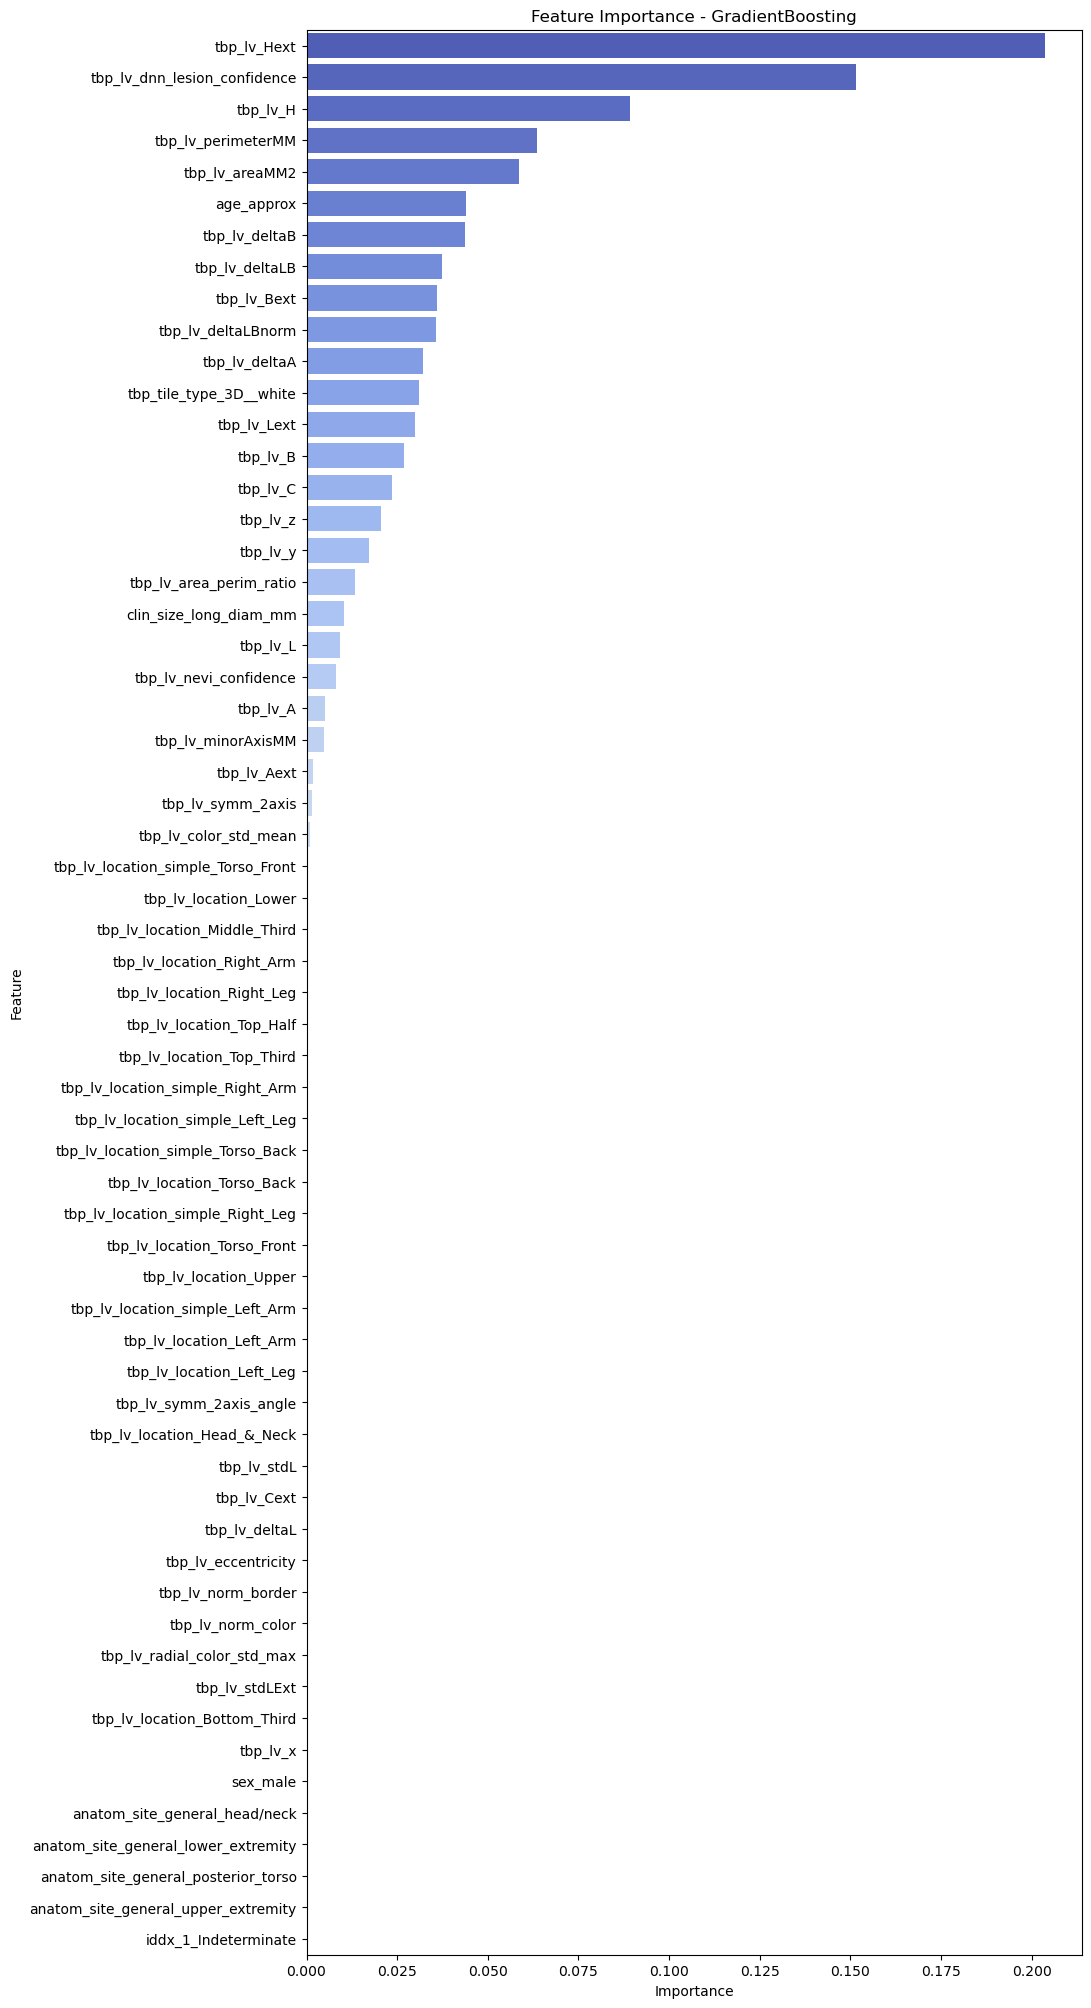

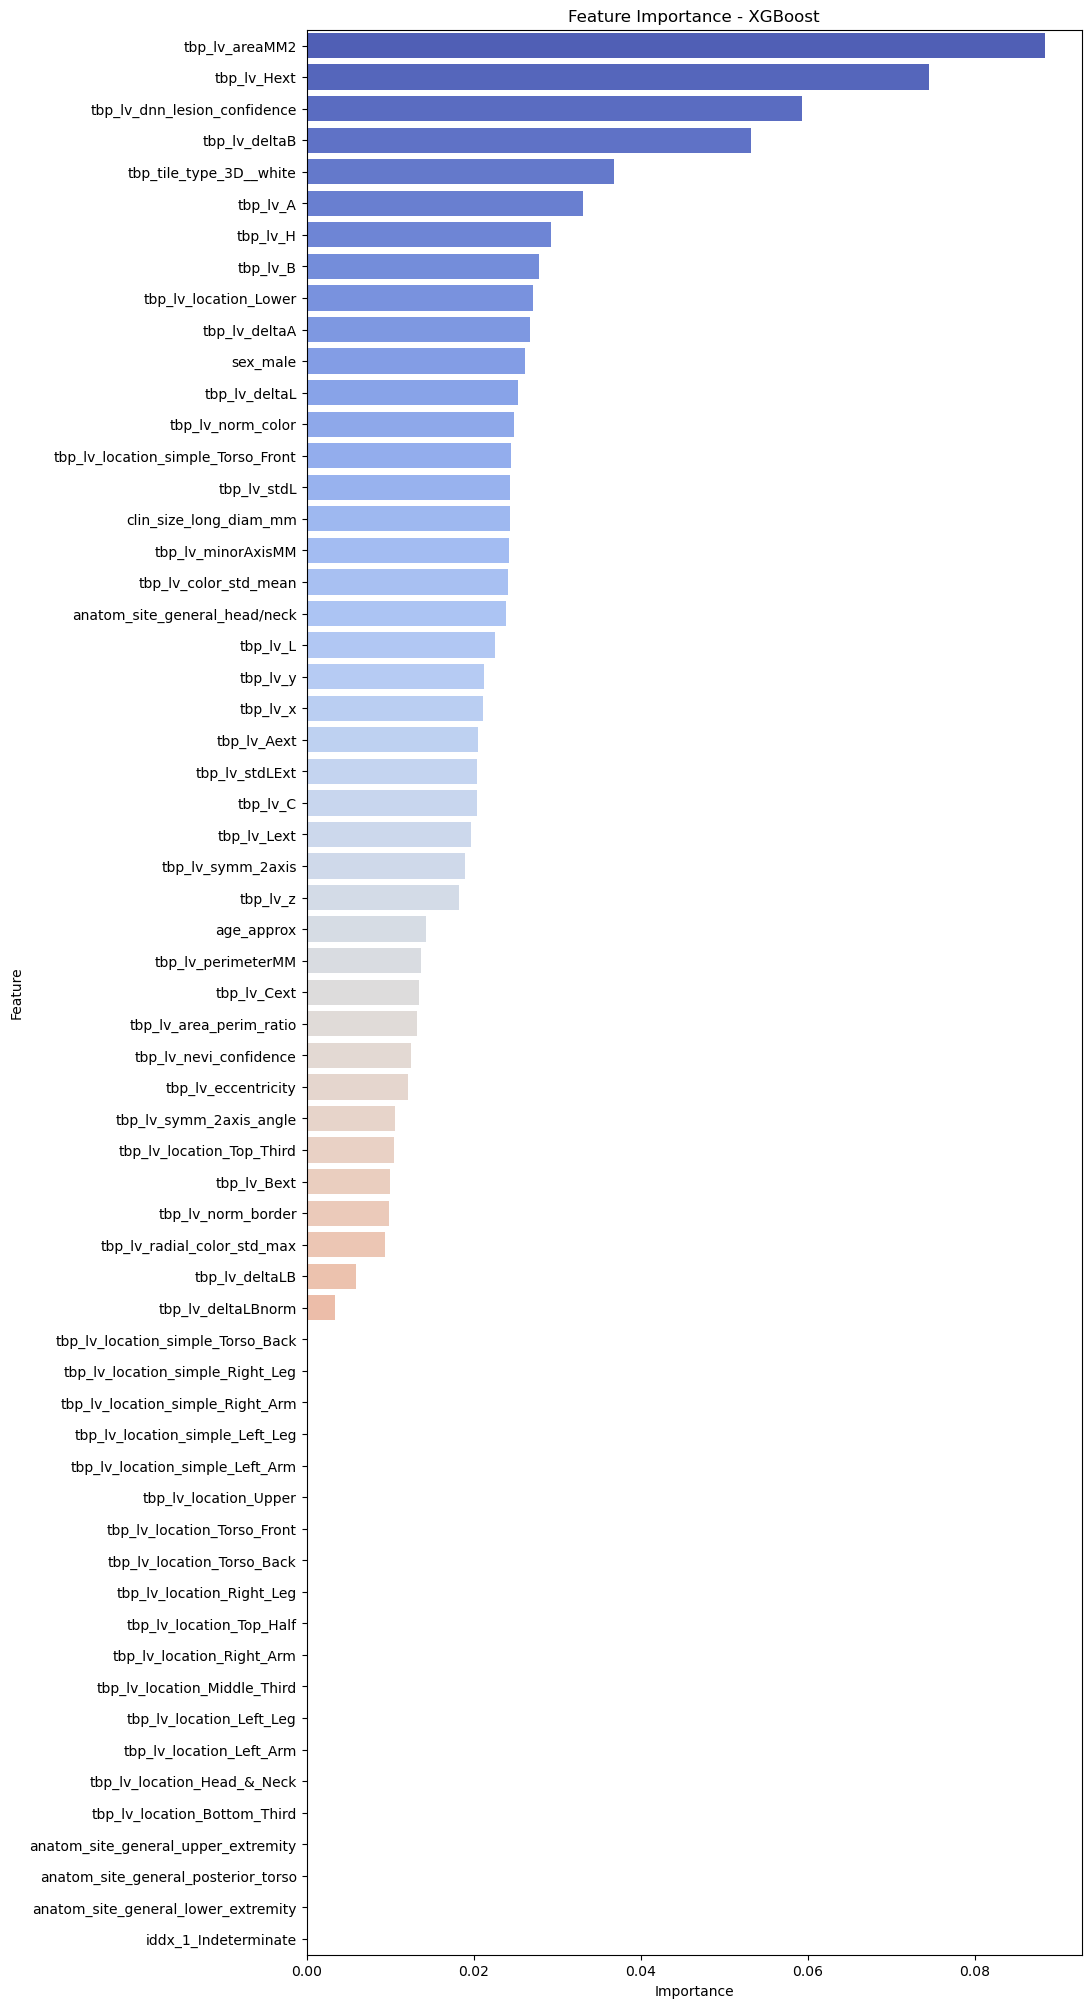

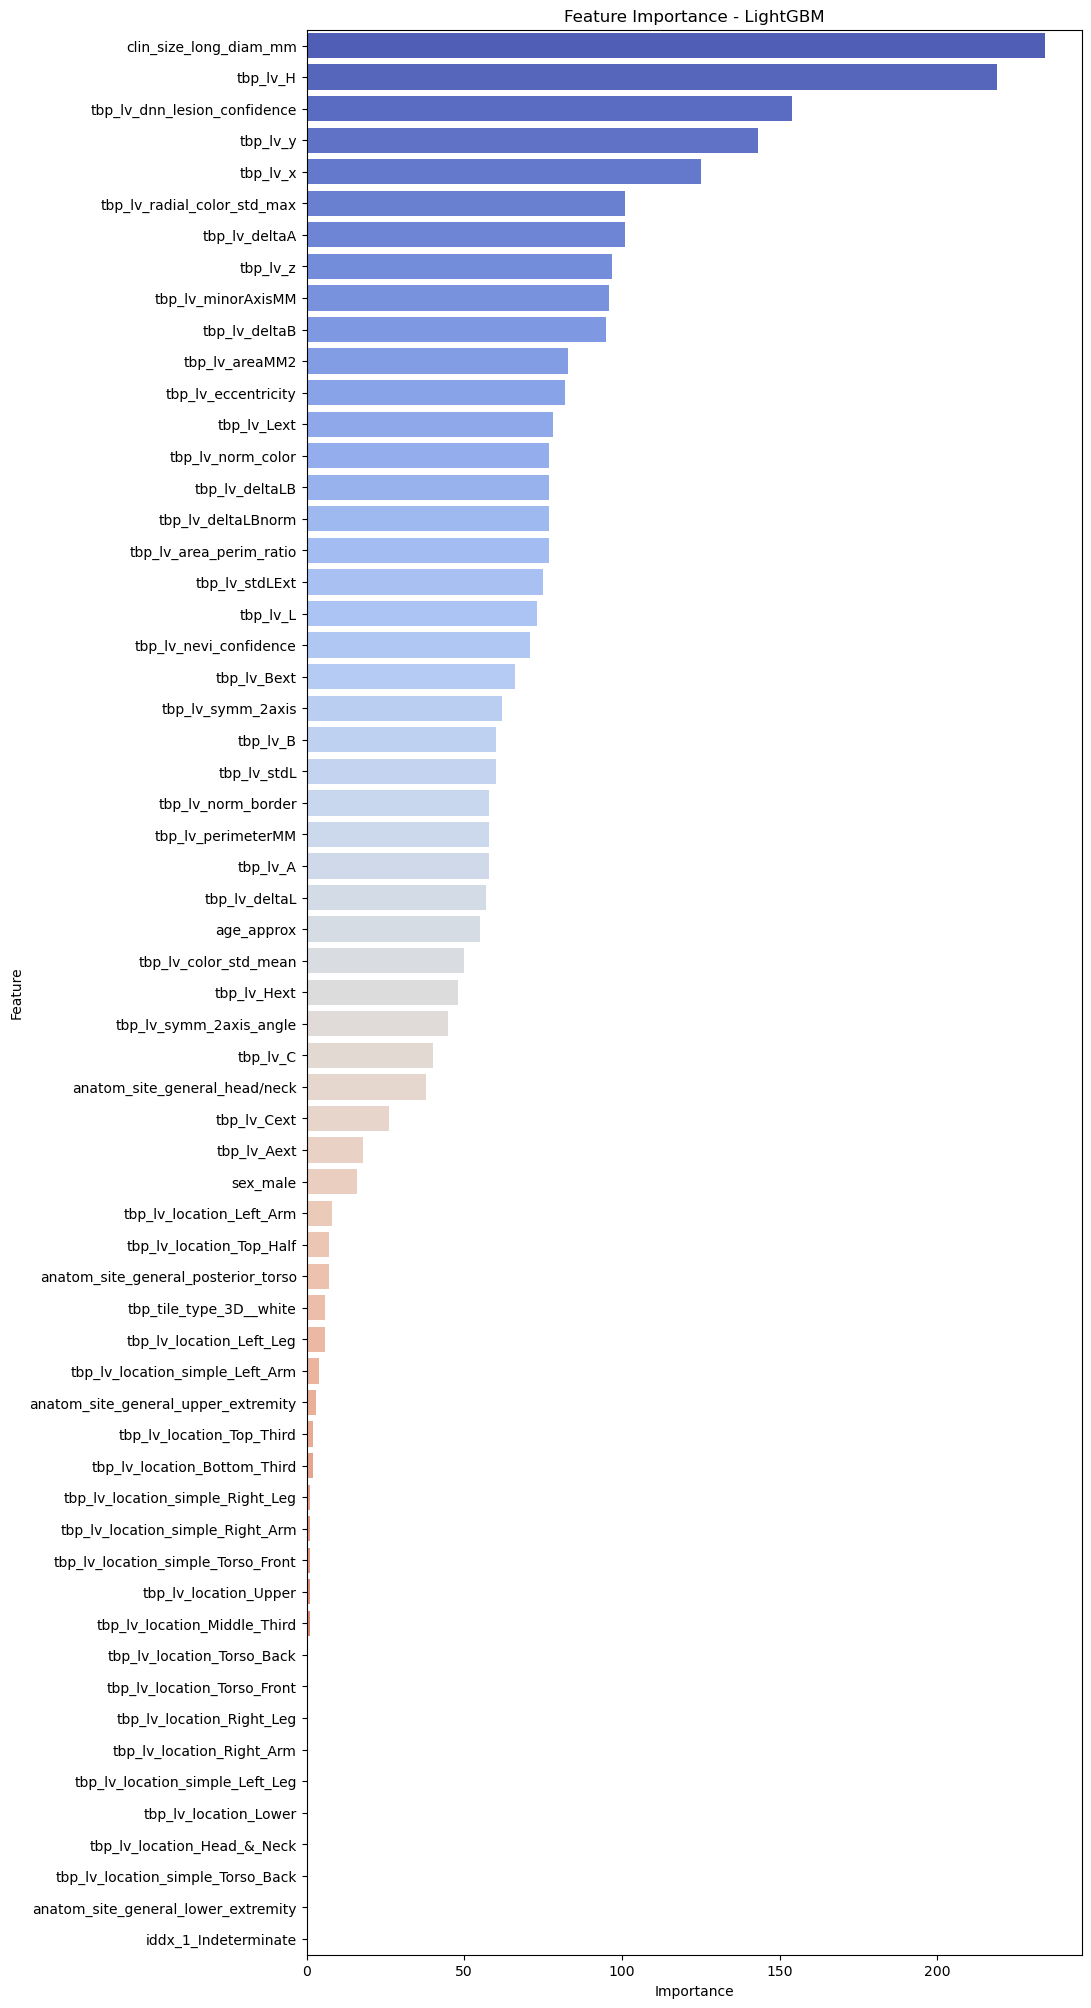

In [52]:

def plot_feature_importance(importance, model_name, color_start, color_end):
    # Crear un DataFrame para la importancia de las características
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importance
    })

    # Ordenar de mayor a menor
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Crear un rango de colores con degradado
    colors = sns.color_palette("coolwarm", len(importance_df))

    # Graficar
    plt.figure(figsize=(10, 25))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Importancias de las características de los modelos entrenados
ada_importance = ada.feature_importances_
gb_importance = gb.feature_importances_
xgb_importance = xgb.feature_importances_
lgb_importance = lgb.feature_importances_

# Graficar la importancia de las características para cada modelo
plot_feature_importance(ada_importance, 'AdaBoost', color_start='#FF5733', color_end='#900C3F')
plot_feature_importance(gb_importance, 'GradientBoosting', color_start='#33FF57', color_end='#0C3F90')
plot_feature_importance(xgb_importance, 'XGBoost', color_start='#3357FF', color_end='#3F0C90')
plot_feature_importance(lgb_importance, 'LightGBM', color_start='#FF5733', color_end='#33FF57')

In [54]:

# Predecir los resultados en el conjunto de prueba
ada_pred = ada.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgb_pred = lgb.predict(X_test)

# Calcular Recall y F1-Score para cada modelo
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)

gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

# Mostrar los resultados
print(f"AdaBoost - Recall: {ada_recall:.2f}, F1-Score: {ada_f1:.2f}")
print(f"GradientBoosting - Recall: {gb_recall:.2f}, F1-Score: {gb_f1:.2f}")
print(f"XGBoost - Recall: {xgb_recall:.2f}, F1-Score: {xgb_f1:.2f}")
print(f"LightGBM - Recall: {lgb_recall:.2f}, F1-Score: {lgb_f1:.2f}")

AdaBoost - Recall: 0.00, F1-Score: 0.00
GradientBoosting - Recall: 0.01, F1-Score: 0.03
XGBoost - Recall: 0.00, F1-Score: 0.00
LightGBM - Recall: 0.01, F1-Score: 0.02


Viendo las muestras, tenemos un problema de desbalanceo y oversampling asi que tomamos medidas con el metodo SMOTE para generar nuevas muestras sintéticas de la clase minoritaria utilizando el algoritmo SMOTE (Synthetic Minority Over-sampling Technique) y reentrenamos los modelos

In [56]:

# Aplicar SMOTE para equilibrar las clases

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Entrenar los modelos de nuevo con los datos balanceados
ada.fit(X_train_resampled, y_train_resampled)
gb.fit(X_train_resampled, y_train_resampled)
xgb.fit(X_train_resampled, y_train_resampled)
lgb.fit(X_train_resampled, y_train_resampled)

LGBMClassifier(learning_rate=0.01, random_state=42, verbose=-1)

In [57]:
# comprobamos metricas

# Predecir los resultados en el conjunto de prueba
ada_pred = ada.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgb_pred = lgb.predict(X_test)

# Calcular Recall y F1-Score para cada modelo
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)

gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

# Mostrar los resultados
print(f"AdaBoost - Recall: {ada_recall:.2f}, F1-Score: {ada_f1:.2f}")
print(f"GradientBoosting - Recall: {gb_recall:.2f}, F1-Score: {gb_f1:.2f}")
print(f"XGBoost - Recall: {xgb_recall:.2f}, F1-Score: {xgb_f1:.2f}")
print(f"LightGBM - Recall: {lgb_recall:.2f}, F1-Score: {lgb_f1:.2f}")

AdaBoost - Recall: 0.66, F1-Score: 0.01
GradientBoosting - Recall: 0.81, F1-Score: 0.01
XGBoost - Recall: 0.71, F1-Score: 0.02
LightGBM - Recall: 0.77, F1-Score: 0.02


Han mejorado las metricas, no obstante deben mejorar aun mas, asi que ajustaremos los pesos en las clases, en mayoría de los modelos en sklearn, como XGBoost, LightGBM, y AdaBoost, permiten asignar un peso mayor a la clase minoritaria, haciendo que los errores en esa clase sean más costosos para el modelo.

tambien aplicaremos cambios en las metricas del entrenamiento para actuvar GPU y el uso de todas los nucleos de CPU disponibles segun el caso

separaremos los modelos para ir evaluando resultados


In [ ]:

# Calcular pesos de clase
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Crear y entrenar el modelo AdaBoost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
ada.fit(X_train_resampled, y_train_resampled, sample_weight=y_train_resampled.map(class_weight_dict))

In [63]:

# Calcular pesos de clase
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Crear y entrenar el modelo Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=42, n_iter_no_change=10, max_features='sqrt')
weights = np.where(y_train_resampled == 1, class_weights[1], class_weights[0])
gb.fit(X_train_resampled, y_train_resampled,sample_weight=weights)

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           n_iter_no_change=10, random_state=42)

In [69]:

# Calcular la relación de clases
scale_pos_weight = (len(y_train_resampled) - np.sum(y_train_resampled)) / np.sum(y_train_resampled)

# Crear y entrenar el modelo XGBoost
xgb = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.01, 
    random_state=42, 
  
    scale_pos_weight=scale_pos_weight
)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [66]:

# Crear y entrenar el modelo LightGBM
lgb = LGBMClassifier(
    n_estimators=100, 
    learning_rate=0.01, 
    random_state=42, 
    DUSE_GPU=1,  # Usa GPU para el entrenamiento
    gpu_platform_id=0,
    gpu_device_id=0
)

# Ajustar pesos en el conjunto de entrenamiento
weights = np.where(y_train_resampled == 1, class_weights[1], class_weights[0])
lgb.fit(X_train_resampled, y_train_resampled, sample_weight=weights)

LGBMClassifier(DUSE_GPU=1, gpu_device_id=0, gpu_platform_id=0,
               learning_rate=0.01, random_state=42)

In [71]:
# comprobamos metricas

# Predecir los resultados en el conjunto de prueba
#ada_pred = ada.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgb_pred = lgb.predict(X_test)

# Calcular Recall y F1-Score para cada modelo
#ada_recall = recall_score(y_test, ada_pred)
#da_f1 = f1_score(y_test, ada_pred)

gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

# Mostrar los resultados
print(f"AdaBoost - Recall: {ada_recall:.2f}, F1-Score: {ada_f1:.2f}")
print(f"GradientBoosting - Recall: {gb_recall:.2f}, F1-Score: {gb_f1:.2f}")
print(f"XGBoost - Recall: {xgb_recall:.2f}, F1-Score: {xgb_f1:.2f}")
print(f"LightGBM - Recall: {lgb_recall:.2f}, F1-Score: {lgb_f1:.2f}")

AdaBoost - Recall: 0.66, F1-Score: 0.01
GradientBoosting - Recall: 0.81, F1-Score: 0.01
XGBoost - Recall: 0.71, F1-Score: 0.02
LightGBM - Recall: 0.77, F1-Score: 0.02


In [74]:

# Calcular los pesos de las clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Crear y entrenar el modelo RandomForest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weight_dict,
    n_jobs=-1  # Utiliza todos los núcleos de la CPU
)

# Entrenar el modelo
rf.fit(X_train_resampled, y_train_resampled)

# Predicciones
y_train_pred = rf.predict(X_train_resampled)
y_test_pred = rf.predict(X_test)

# Métricas de evaluación
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Random Forest - Accuracy Train: {train_accuracy}")
print(f"Random Forest - Accuracy Test: {test_accuracy}")
print(f"Random Forest - Recall Train: {train_recall}")
print(f"Random Forest - Recall Test: {test_recall}")
print(f"Random Forest - F1-Score Train: {train_f1}")
print(f"Random Forest - F1-Score Test: {test_f1}")

Random Forest - Accuracy Train: 1.0
Random Forest - Accuracy Test: 0.9981540395114096
Random Forest - Recall Train: 1.0
Random Forest - Recall Test: 0.06493506493506493
Random Forest - F1-Score Train: 1.0
Random Forest - F1-Score Test: 0.06622516556291391


In [75]:

# Crear el ensemble con votación blanda
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('ada', ada),
        ('xgb', xgb)
    ],
    voting='soft'  # 'soft' para promediar las probabilidades; 'hard' para voto por mayoría
)

# Entrenar el ensemble
ensemble.fit(X_train_resampled, y_train_resampled)

# Predicciones
y_train_pred = ensemble.predict(X_train_resampled)
y_test_pred = ensemble.predict(X_test)

# Métricas de evaluación
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Ensemble - Accuracy Train: {train_accuracy}")
print(f"Ensemble - Accuracy Test: {test_accuracy}")
print(f"Ensemble - Recall Train: {train_recall}")
print(f"Ensemble - Recall Test: {test_recall}")
print(f"Ensemble - F1-Score Train: {train_f1}")
print(f"Ensemble - F1-Score Test: {test_f1}")

Ensemble - Accuracy Train: 0.9863314844361737
Ensemble - Accuracy Test: 0.9775735438513805
Ensemble - Recall Train: 0.9889721420451009
Ensemble - Recall Test: 0.5324675324675324
Ensemble - F1-Score Train: 0.986367483245271
Ensemble - F1-Score Test: 0.0456824512534819


In [76]:
#limpieza del sataset original para eliminar tokens
#liminamos columna "iddx_1_Malignant"
metadata_processed = metadata_processed.drop('iddx_1_Malignant', axis=1)

#seleccionamos y eliminamos todas las columnas resultantes de la tokenizacion
columns_to_drop = metadata_processed.filter(like='token_').columns

# Eliminar estas columnas de los conjuntos de entrenamiento y prueba
metadata_processed_ntk = metadata_processed.drop(columns=columns_to_drop)

#actualizamos el dataset en dataset procesado

# Guardar el DataFrame procesado como un archivo CSV
metadata_processed_ntk.to_csv('metadata_processed_ntk.csv', index=True)

print("El DataFrame ha sido guardado como 'metadata_processed_ntk.csv'.")

metadata_processed_ntk

El DataFrame ha sido guardado como 'metadata_processed_ntk.csv'.


,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_location_Torso_Back,tbp_lv_location_Torso_Front,tbp_lv_location_Upper,tbp_lv_location_simple_Left_Arm,tbp_lv_location_simple_Left_Leg,tbp_lv_location_simple_Right_Arm,tbp_lv_location_simple_Right_Leg,tbp_lv_location_simple_Torso_Back,tbp_lv_location_simple_Torso_Front,iddx_1_Indeterminate
isic_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0015670,0,60.0,3.04,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,...,0,0,1,0,0,0,1,0,0,0
ISIC_0015845,0,60.0,1.10,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,...,0,0,0,0,0,0,0,0,0,0
ISIC_0015864,0,60.0,3.40,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,...,0,0,0,0,0,0,0,1,0,0
ISIC_0015902,0,65.0,3.22,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,...,0,0,0,0,0,0,0,0,1,0
ISIC_0024200,0,55.0,2.73,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_9999937,0,70.0,6.80,22.574335,14.944666,27.663259,26.767135,35.705132,30.656525,50.784168,...,0,0,0,0,0,0,0,0,1,0
ISIC_9999951,0,60.0,3.11,19.977640,16.026870,34.158840,31.011870,39.571870,34.908400,59.678970,...,0,0,0,0,0,0,0,1,0,0
ISIC_9999960,0,65.0,2.05,17.332567,12.364397,29.845326,26.500073,34.513206,29.242644,59.854275,...,0,0,0,0,0,0,0,0,1,0
